In [221]:
!pip install openpyxl

In [222]:
!pip install emoji

In [223]:
!pip install wordcloud

In [224]:
!pip install pyspellchecker

In [225]:
import os
import pandas as pd
import emoji

In [226]:
# ejecutar luego de subir archivo excel o tener vinculado Google Drive

if os.path.isfile("mensajes_trabajo_final.xlsx"):
  df = pd.read_excel("mensajes_trabajo_final.xlsx")
elif os.path.isfile("/content/mensajes_trabajo_final.xlsx"):
  df = pd.read_excel("/content/mensajes_trabajo_final.xlsx")
else:
  from google.colab import drive
  drive.mount('/content/drive')
  file_path = '/content/drive/MyDrive/UCU-NLP/mensajes_trabajo_final.xlsx'
  df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataframe
print("Datos cargados:")
print(df.head())


df = pd.read_excel('mensajes_trabajo_final.xlsx')
df = df[df['recibido'] != '']
df.head()

Datos cargados:
   id_participante  id_mensaje  \
0                1           1   
1                1           2   
2                2           3   
3                3           4   
4                3           5   

                                                                                                                                                                     enviado  \
0  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para cuidarte y mejorar tu salud. Podés dejar de recibir estos mensajes enviando 'BAJA' a este número.   
1  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para cuidarte y mejorar tu salud. Podés dejar de recibir estos mensajes enviando 'BAJA' a este número.   
2                                          Hemos llegado al final de nuestro programa de mensajes. Recordá que siempre contás con el apoyo del equipo de salud de tu centro.   
3  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para 

id_participante  id_mensaje  \
0                1           1   
1                1           2   
2                2           3   
3                3           4   
4                3           5   

                                                                                                                                                                     enviado  \
0  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para cuidarte y mejorar tu salud. Podés dejar de recibir estos mensajes enviando 'BAJA' a este número.   
1  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para cuidarte y mejorar tu salud. Podés dejar de recibir estos mensajes enviando 'BAJA' a este número.   
2                                          Hemos llegado al final de nuestro programa de mensajes. Recordá que siempre contás con el apoyo del equipo de salud de tu centro.   
3  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para cuidarte y mejorar tu salud. Podés dejar de recibir estos mensajes enviando 'BAJA' a este número.   
4  ¡Te damos la bienvenida! Recibirás un mensaje semanal con consejos para cuidarte y mejorar tu salud. Podés dejar de recibir estos mensajes enviando 'BAJA' a este número.   

         tipo subtipo              recibido           clase  
0         NaN     NaN  SÍ quiero recibirlos           optin  
1         NaN     NaN  SÍ quiero recibirlos           optin  
2       final     NaN               Gracias  agradecimiento  
3  bienvenida     NaN  SÍ quiero recibirlos           optin  
4  bienvenida     NaN  Bueno muchas gracias  agradecimiento

In [227]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
import numpy as np
import re
import urllib.request

# instalar fuente con soporte (limitado) para emojis.
github_url = 'https://raw.githubusercontent.com/google/fonts/main/ofl/alike/Alike-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html
response = urllib.request.urlretrieve(url, "Alike-Regular.ttf")

# si se agrega una lista de palabras a incluir solo se devuelven esas palabras si aparecen en el texto
# si se agrega una lista de palabras a excluir las mismas no se devolverán por más que estén en el texto
# si una misma palabra está en la lista de incluir y en la lista de excluir entonces será excluida
def contar_frecuencia_palabras(df, columna, palabras_incluir = None, palabras_excluir = None):
    texto_completo = " ".join(texto for texto in df[columna].astype('str'))
    palabras = re.findall(r'\b\w+\b|[\U00002700-\U0001FAFF]', texto_completo)
    if palabras_incluir is not None:
        palabras = [palabra for palabra in palabras if palabra in palabras_incluir]
    if palabras_excluir is not None:
        palabras = [palabra for palabra in palabras if palabra not in palabras_excluir]
    frecuencia = Counter(palabras)
    palabras_ordenadas = frecuencia.most_common()
    return palabras_ordenadas


# grafica de palabras mostrando cantidad y frecuencia acumulada
# se muestran start_n elementos del principio y end_n elementos del final de los datos
def plot_word_frecuencies(data, start_n=5, end_n=5, ax1=None):

    if ax1 is None:
        ax1 = plt.gca()  # Obtiene el contexto actual de los ejes si no se proporciona uno


    # Extraer palabras y frecuencias
    words, frequencies = zip(*data)

    # Calcular frecuencias acumuladas
    cumulative_frequencies = np.cumsum(frequencies)

    total_frequency = cumulative_frequencies[-1]
    cumulative_percentages = cumulative_frequencies / total_frequency * 100  # Convertir a porcentajes

    # Seleccionar elementos según start_n y end_n
    selected_words = []
    selected_frequencies = []
    selected_cumulative_percentages = []

    if start_n > 0:
        selected_words.extend(words[:start_n])
        selected_frequencies.extend(frequencies[:start_n])
        selected_cumulative_percentages.extend(cumulative_percentages[:start_n])

    if end_n > 0:
        selected_words.extend(words[-end_n:])
        selected_frequencies.extend(frequencies[-end_n:])
        selected_cumulative_percentages.extend(cumulative_percentages[-end_n:])

    # Graficar frecuencias
    color = 'tab:blue'
    prop = fm.FontProperties(fname='Alike-Regular.ttf')
    
    ax1.set_xlabel('Palabras')
    ax1.set_ylabel('Frecuencia', color=color)
    ax1.bar(selected_words, selected_frequencies, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(range(len(selected_words)))
    ax1.set_xticklabels([str(i) + ': ' + selected_words[i] for i in range(len(selected_words))], rotation=45, ha='right', fontproperties=prop)

    # Crear un segundo eje para las frecuencias acumuladas en porcentaje
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Frecuencia acumulada (%)', color=color)
    ax2.plot(selected_words, selected_cumulative_percentages, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=5)
    ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_title('Frecuencias de palabras y acumulación en porcentaje')

    return ax1, ax2


def crear_nube(df=None, columna=None, frecuencias=None, min_word_length=1, ancho=800, alto=400, palabras_incluir = None, palabras_excluir = None):
    wordcloud = None
    if frecuencias is None and df is not None and columna is not None:
        frecuencias={wf[0]:wf[1] for wf in contar_frecuencia_palabras(df, columna, palabras_incluir = palabras_incluir, palabras_excluir = palabras_excluir)}
    if frecuencias is not None:
        wordcloud = WordCloud(width = ancho, height = alto, background_color ='white', min_word_length=1).generate_from_frequencies(frecuencias)
        
    return wordcloud


def nube(df=None, columna=None, frecuencias=None, min_word_length=1, ancho=800, alto=400, palabras_incluir = None, palabras_excluir = None):
    wordcloud = crear_nube(df=df, columna=columna, frecuencias=frecuencias, min_word_length=min_word_length, ancho=ancho, alto=alto, palabras_incluir = palabras_incluir, palabras_excluir = palabras_excluir)
    # Visualizar la nube de palabras
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    # Mostrar la nube de palabras
    plt.show()


def mostrar_conteo(df, columna, palabras_incluir = None, palabras_excluir = None, palabras_inicio=25, palabras_fin=0):
    frecuencias = contar_frecuencia_palabras(df, columna, palabras_incluir = palabras_incluir, palabras_excluir = palabras_excluir)
    print("Frecuencias primeros 20:", frecuencias[:min(20,len(frecuencias))])
    print("Frecuencias últimos 20:", frecuencias[len(frecuencias)-min(20,len(frecuencias)):])

    print(f"Cantidad de palabras totales: {sum([wf[1] for wf in frecuencias])}")
    print(f"Cantidad de palabras únicas: {len(frecuencias)}")
    palabras_raras = [x[0] for x in frecuencias if x[1]<=3]
    print(f"Cantidad de palabras frecuencia <=3: {len(palabras_raras)}")
    palabras_unicas = [x[0] for x in frecuencias if x[1]==1]
    print(f"Cantidad de palabras frecuencia =1: {len(palabras_unicas)}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    ax1.imshow(crear_nube(df, columna, palabras_incluir = palabras_incluir, palabras_excluir = palabras_excluir))
    ax1.axis('off')
    
    ax2, ax2_2 = plot_word_frecuencies(frecuencias, palabras_inicio, palabras_fin, ax2)
    
    plt.tight_layout()
    plt.show()



    return frecuencias


Frecuencias primeros 20: [('quiero', 1762), ('recibirlos', 1654), ('SÍ', 1531), ('gracias', 1118), ('Gracias', 764), ('Si', 717), ('Hola', 680), ('👍', 581), ('me', 542), ('de', 524), ('Ok', 490), ('no', 476), ('la', 437), ('y', 420), ('por', 403), ('el', 396), ('si', 374), ('que', 361), ('a', 346), ('los', 283)]
Frecuencias últimos 20: [('comunicar', 1), ('conmigo', 1), ('Llamame', 1), ('empiece', 1), ('haga', 1), ('Hacer', 1), ('CeSac', 1), ('Cerro', 1), ('Leones', 1), ('dejanos', 1), ('acción', 1), ('Dejanos', 1), ('comunicaremos', 1), ('🌸', 1), ('enfermera', 1), ('Co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1), ('grscias', 1)]
Cantidad de palabras totales: 33141
Cantidad de palabras únicas: 3680
Cantidad de palabras frecuencia <=3: 2880
Cantidad de palabras frecuencia =1: 2148


C:\Users\aciga\AppData\Local\Temp\ipykernel_32136\1170721178.py:125: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\aciga\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


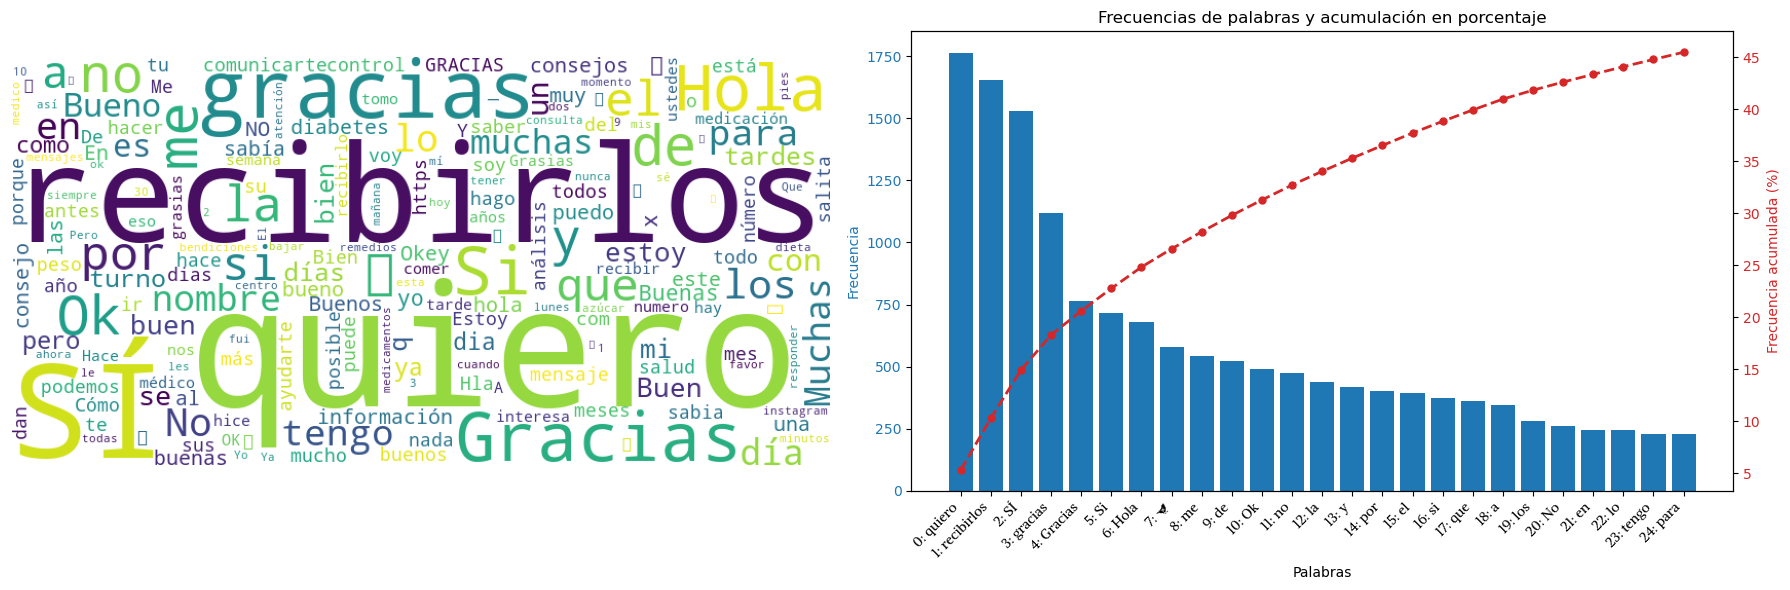

[('quiero', 1762),
 ('recibirlos', 1654),
 ('SÍ', 1531),
 ('gracias', 1118),
 ('Gracias', 764),
 ('Si', 717),
 ('Hola', 680),
 ('👍', 581),
 ('me', 542),
 ('de', 524),
 ('Ok', 490),
 ('no', 476),
 ('la', 437),
 ('y', 420),
 ('por', 403),
 ('el', 396),
 ('si', 374),
 ('que', 361),
 ('a', 346),
 ('los', 283),
 ('No', 260),
 ('en', 246),
 ('lo', 244),
 ('tengo', 230),
 ('para', 230),
 ('nombre', 221),
 ('Muchas', 219),
 ('día', 218),
 ('muchas', 199),
 ('Bueno', 191),
 ('es', 180),
 ('con', 174),
 ('un', 160),
 ('se', 139),
 ('Buen', 131),
 ('estoy', 131),
 ('mi', 130),
 ('buen', 128),
 ('bien', 122),
 ('tardes', 120),
 ('q', 120),
 ('días', 119),
 ('turno', 118),
 ('🏻', 117),
 ('pero', 108),
 ('dia', 103),
 ('ya', 100),
 ('como', 93),
 ('x', 85),
 ('yo', 83),
 ('👏', 83),
 ('Buenas', 82),
 ('buenas', 78),
 ('consejos', 77),
 ('bueno', 76),
 ('️', 76),
 ('Buenos', 75),
 ('información', 75),
 ('En', 74),
 ('una', 72),
 ('puedo', 71),
 ('muy', 71),
 ('diabetes', 68),
 ('✨', 68),
 ('al', 66),


In [269]:
mostrar_conteo(df,'recibido')

In [229]:
# la fuente usada por wordcloud no soporta emoticones
# La que se instaló para matplolib no parece muy buena, no se reconoce el pulgar hacia arriba
# Los mensajes de consentimiento se responden con botones que generan textos "Sí quiero recibirlos" o "No quiero recibirlos". Por ese motivo las palabras más frcuentes son "quiero", "recibirlos" y "Sí". Seguidas por variaciones de "gracias".

Frecuencias primeros 20: [('gracias', 1923), ('quiero', 1783), ('recibirlos', 1656), ('sí', 1565), ('si', 1117), ('no', 802), ('hola', 757), ('me', 602), ('de', 580), ('ok', 541), ('👍', 519), ('y', 466), ('la', 460), ('muchas', 435), ('el', 427), ('por', 425), ('que', 392), ('a', 375), ('en', 328), ('los', 296)]
Frecuencias últimos 20: [('práctica', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('haga', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('acción', 1), ('comunicaremos', 1), ('🌸', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1)]
Cantidad de palabras totales: 33050
Cantidad de palabras únicas: 3115
Cantidad de palabras frecuencia <=3: 2380
Cantidad de palabras frecuencia =1: 1732


C:\Users\aciga\AppData\Local\Temp\ipykernel_32136\1170721178.py:125: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\aciga\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


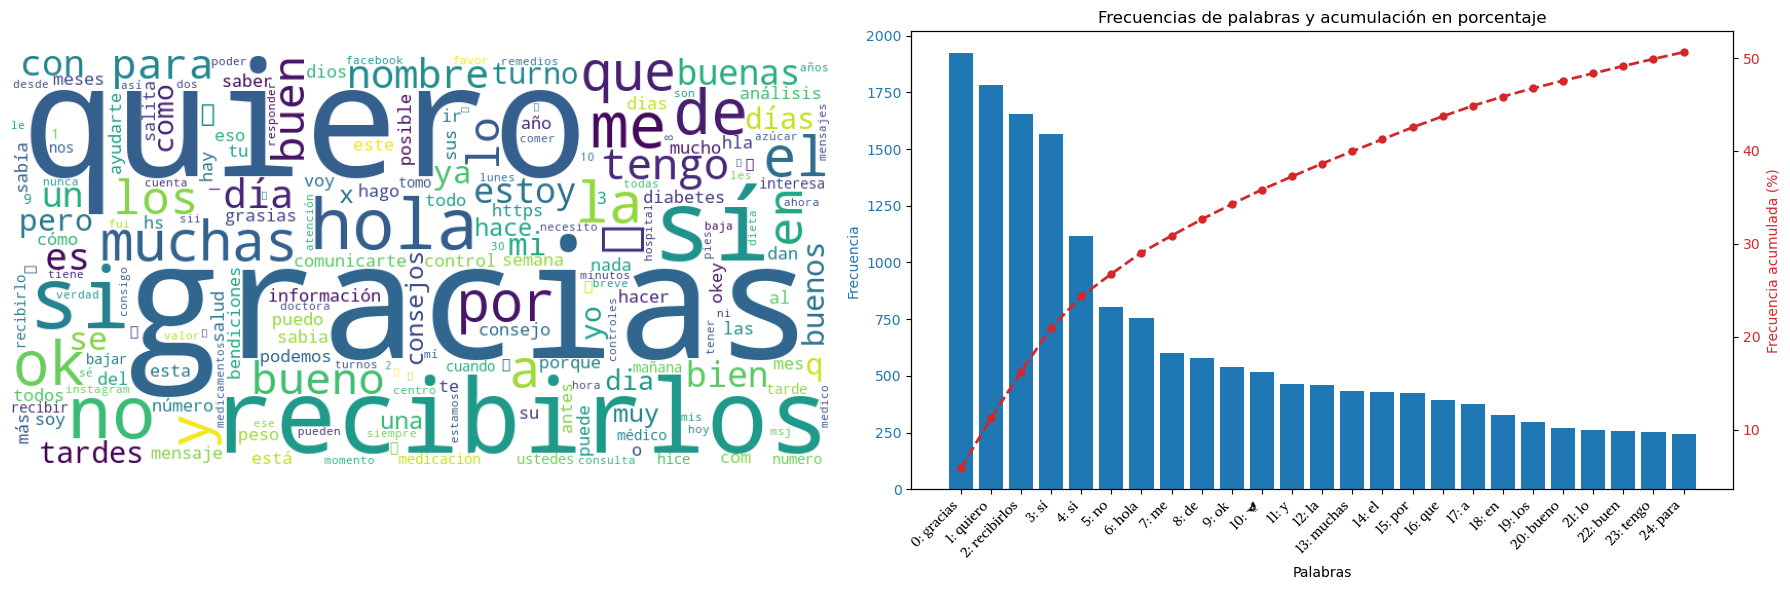

[('gracias', 1923),
 ('quiero', 1783),
 ('recibirlos', 1656),
 ('sí', 1565),
 ('si', 1117),
 ('no', 802),
 ('hola', 757),
 ('me', 602),
 ('de', 580),
 ('ok', 541),
 ('👍', 519),
 ('y', 466),
 ('la', 460),
 ('muchas', 435),
 ('el', 427),
 ('por', 425),
 ('que', 392),
 ('a', 375),
 ('en', 328),
 ('los', 296),
 ('bueno', 269),
 ('lo', 263),
 ('buen', 259),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('día', 218),
 ('es', 201),
 ('con', 183),
 ('estoy', 171),
 ('bien', 170),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('q', 124),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 118),
 ('🏻', 117),
 ('yo', 111),
 ('como', 111),
 ('dia', 106),
 ('x', 93),
 ('muy', 91),
 ('consejos', 84),
 ('una', 84),
 ('hace', 83),
 ('información', 76),
 ('️', 76),
 ('puedo', 74),
 ('este', 73),
 ('diabetes', 71),
 ('al', 69),
 ('sabía', 67),
 ('grasias', 64),
 ('las', 63),
 ('consejo', 62),
 ('te', 61),
 ('okey', 61),
 ('mucho', 59),
 ('cóm

In [230]:
#### LIMPIEZA ####
def separa_letra_numero(line):
    return re.sub('([\d]+)([a-zA-Z]+)','\\1 \\2',re.sub('([a-zA-Z]+)([\d]+)','\\1 \\2',str(line)))
def puntuacion(line): # mantiene emoticones
    return re.sub('([^\U00002700-\U0001FAFF^\w\s@#]+)', ' ', line)
def blank_line(line):
    return re.sub(r'[("\n\r")\n]',' ', line)
def minuscula(line):
    return line.lower()
def letras_repetidas(line):
    return re.sub("(.)\\1{2,}", "\\1", line)
def espacios_dobles(line):
    return re.sub('\s\s+', ' ', line)

df['recibido_limpio'] = df['recibido'].apply(separa_letra_numero).apply(puntuacion).apply(blank_line).apply(minuscula).apply(letras_repetidas).apply(espacios_dobles)

mostrar_conteo(df,'recibido_limpio')

cp_limpio = contar_frecuencia_palabras(df, "recibido_limpio")
cp_limpio

In [231]:
# CORRECCIÓN ORTOGRÁFICA
# se analiza el uso de SpellChecker usando su diccionario en español.
# se guarda dataframe de palabras no encontradas, su frecuencia en el texto, la corrección sugerida y otras palabras candidatas.
# el proceso demora varios minutos, se puede leer la revisión anterior si existe.

from spellchecker import SpellChecker

archivo_revision_ortografica = "correcciones_spellchecker.csv"

if os.path.isfile(archivo_revision_ortografica):
    df_correcciones = pd.read_csv(archivo_revision_ortografica)
else:
    
    dict_frecuencias = {wf[0]:wf[1] for wf in contar_frecuencia_palabras(df, "recibido_limpio") if 'em_' not in wf[0]}
    
    spell = SpellChecker(language='es')  # Establecer el idioma a español
    
    palabras_erroneas = spell.unknown(list(dict_frecuencias.keys()))
    
    lista_correcciones = []
    
    for palabra_erronea in palabras_erroneas:
        # Obtener la corrección más probable
        correcta = spell.correction(palabra_erronea)
        
        # Obtener una lista de posibles correcciones
        candidatos = spell.candidates(palabra_erronea)
    
        if candidatos:
            candidatos_str = ', '.join(candidatos)
        else:
            candidatos_str = ''
        
        # Añadir al DataFrame
        lista_correcciones.append({
            'Equivocada': palabra_erronea,
            'Frecuencia': dict_frecuencias[palabra_erronea],
            'Sugerencia': correcta,
            'Candidatas': candidatos_str
        })
    
    # Crear DataFrame
    df_correcciones = pd.DataFrame(lista_correcciones)
    df_correcciones.to_csv(archivo_revision_ortografica)

# visualización de palabras detectadas como erróneas
df_correcciones.shape
print(df_correcciones.head())
print(df_correcciones.tail())

   Unnamed: 0 Equivocada  Frecuencia Sugerencia  \
0           0    ustedes          32      usted   
1           1  comercial           2  comerciar   
2           2      offer           1       oler   
3           3     ultumo           1     último   
4           4     cremas           1      crema   

                           Candidatas  
0                               usted  
1                comerciar, comerical  
2        oler, orfre, afer, fer, fuer  
3  ulmo, ulluco, tumo, último, totumo  
4                               crema  
      Unnamed: 0  Equivocada  Frecuencia Sugerencia  \
1763        1763          dl           1         de   
1764        1764     chequeo           1     cheque   
1765        1765  responderé           5  responder   
1766        1766     niveles           2      nivel   
1767        1767        peke           1       pene   

                                    Candidatas  
1763  él, el, dí, ál, di, del, al, dél, do, de  
1764                    

In [232]:
# búsqueda de errores particulares
df[["recibido_limpio"]][df["recibido_limpio"].str.contains(' b ', na=False)]

recibido_limpio
1973  hola gracias por comunicarte con dinamika 💦 en estos momentos no podemos responder pero en breve sera atendido ✅mientras puede ver nuestros catálogo de articulos disponibles para entrega inmediata 👉sigue el link https wa me c numero 0 ✅ si desean comprar bazar electro libreria perfumeria a precio mayorista👉 sigue el link https chat whatsapp com l 7 o 0 qurugih 2 b 5 qlfl 9 ho 1 ✅ si deseas comprar calzado blanco y indumentaria a precio mayorista 👉sigue el link https c 💥muchas gracias por elegirnos💥
1975  hola gracias por comunicarte con dinamika 💦 en estos momentos no podemos responder pero en breve sera atendido ✅mientras puede ver nuestros catálogo de articulos disponibles para entrega inmediata 👉sigue el link https wa me c numero 0 ✅ si desean comprar bazar electro libreria perfumeria a precio mayorista👉 sigue el link https chat whatsapp com l 7 o 0 qurugih 2 b 5 qlfl 9 ho 1 ✅ si deseas comprar calzado blanco y indumentaria a precio mayorista 👉sigue el link https c 💥muchas gracias por elegirnos💥
5606                                                                                                                                                                                                                                                                                                                                                                                                                     ok b dia nesecito algun turno para realizarme estudio con respecto a la diabetes y otras efermedades
6004                                                                                                                                                                                                                                                                                                                                                                                                                                                                  buenos dia aque salita puedo asercarme estoy en b union

In [233]:
def aplicar_correcciones(line, correcciones, prefijo="", sufijo=""):
    for correccion in correcciones:
        line = re.sub(prefijo + correccion + sufijo, correcciones[correccion], line)
    return(line)

Frecuencias primeros 20: [('gracias', 2043), ('quiero', 1800), ('sí', 1728), ('recibirlos', 1662), ('si', 986), ('no', 803), ('hola', 802), ('ok', 636), ('me', 603), ('de', 596), ('que', 545), ('por', 525), ('👍', 519), ('y', 467), ('la', 461), ('muchas', 435), ('el', 427), ('a', 376), ('día', 344), ('en', 328)]
Frecuencias últimos 20: [('poniendo', 1), ('práctica', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('acción', 1), ('comunicaremos', 1), ('🌸', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1)]
Cantidad de palabras totales: 33083
Cantidad de palabras únicas: 2979
Cantidad de palabras frecuencia <=3: 2290
Cantidad de palabras frecuencia =1: 1672


C:\Users\aciga\AppData\Local\Temp\ipykernel_32136\1170721178.py:125: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\aciga\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


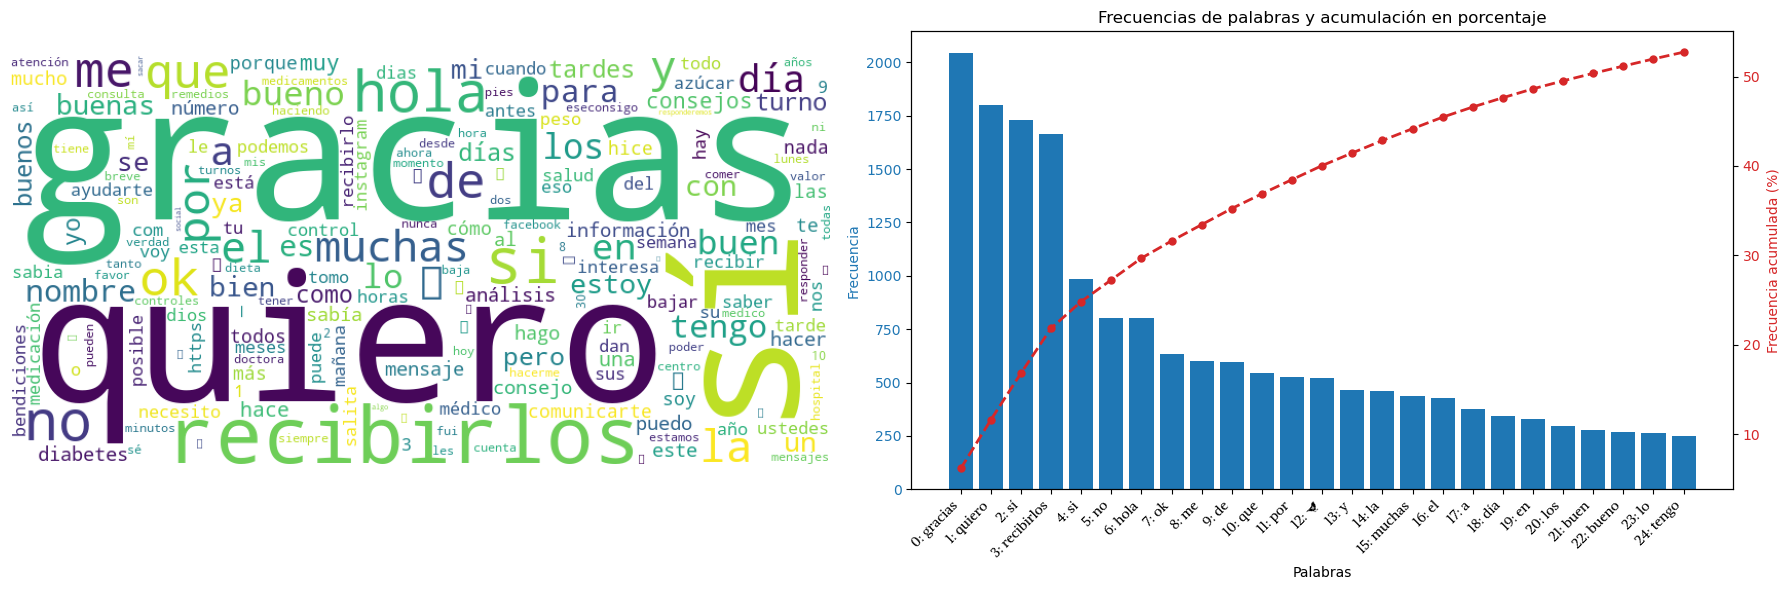

[('gracias', 2043),
 ('quiero', 1800),
 ('sí', 1728),
 ('recibirlos', 1662),
 ('si', 986),
 ('no', 803),
 ('hola', 802),
 ('ok', 636),
 ('me', 603),
 ('de', 596),
 ('que', 545),
 ('por', 525),
 ('👍', 519),
 ('y', 467),
 ('la', 461),
 ('muchas', 435),
 ('el', 427),
 ('a', 376),
 ('día', 344),
 ('en', 328),
 ('los', 296),
 ('buen', 277),
 ('bueno', 269),
 ('lo', 264),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('es', 201),
 ('con', 183),
 ('estoy', 176),
 ('bien', 171),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('🏻', 117),
 ('yo', 111),
 ('como', 111),
 ('muy', 91),
 ('consejos', 91),
 ('una', 84),
 ('hace', 83),
 ('información', 76),
 ('️', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('este', 73),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('al', 69),
 ('hacer', 69),
 ('análisis', 68),
 ('sabía', 67),
 ('más', 63),
 ('las', 63),
 ('te', 62

In [234]:
# no convence hacer las correcciones automáticas por lo que se genera diccionario propio
# el diccionario en español de spellchecker no contiene conjugaciones y algunos modismos locales
correcciones = {}
correcciones['acen|hasen'] = 'hacen'
correcciones['acer'] = 'hacer'
correcciones['actibidad'] = 'actividad'
correcciones['adios'] = 'adiós'
correcciones['aga'] = 'haga'
correcciones['ago'] = 'hago'
correcciones['ahy|ai'] = 'ahí'
correcciones['alcansa'] = 'alcanza'
correcciones['alluda'] = 'ayuda'
correcciones['analices|analicis|analisi|analis|analisis']= 'análisis'
correcciones['aseme|haacerme'] = 'hacerme'
correcciones['asen'] = 'hacen'
correcciones['aser'] = 'hacer'
correcciones['aserme'] = 'hacerme'
correcciones['asiendo'] = 'haciendo'
correcciones['aveces'] = 'a veces'
correcciones['aver'] = 'a ver'
correcciones['ay'] = 'hay'
correcciones['azucar'] = 'azúcar'
correcciones['bici'] = 'bicicleta'
correcciones['bns'] = 'buenos'
correcciones['bs'] = 'beso'
correcciones['buendia|buendía'] = 'buen día'
correcciones['celu'] = 'celular'
correcciones['concejo'] = 'consejo'
correcciones['concejos'] = 'consejos'
correcciones['conosco']='conozco'
correcciones['consejonsaludable'] = 'consejo saludable'
correcciones['d']='de'
correcciones['diabetica']='diabética'
correcciones['diabetico']='diabético'
correcciones['diabétis|diabetis']='diabetes'
correcciones['diavetologa']='diabetóloga'
correcciones['dia|diaa']='día'
correcciones['dl']='del'
correcciones['doc|dr']='doctor'
correcciones['dra']='doctora'
correcciones['estoymedicada']='estoy medicada'
correcciones['esty']='estoy'
correcciones['fabor'] = 'favor'
correcciones['fslta']='falta'
correcciones['gimnacio'] = 'gimnasio'
correcciones['gs|gra a|gacias|grac|grasias|gracia|grasia|grscias|grácias|graciss|gracoas|graccias|graciass|grasiss|grasiaz|gracis|graciaa|graciias']='gracias'
correcciones['guiero|quuero|kiero|quero|qero'] = 'quiero'
correcciones['hare'] = 'haré'
correcciones['hhola|hla|jola|holaa|holaaa|holaaaa'] = 'hola'
correcciones['hicieron'] = 'hicieron'
correcciones['hra'] = 'hora'
correcciones['hs'] = 'horas'
correcciones['ise|hise|ice'] = 'hice'
correcciones['isieron'] = 'hicieron'
correcciones['iso'] = 'hizo'
correcciones['jirnacia'] = 'gimnasia'
correcciones['juves'] = 'jueves'
correcciones['mas'] = 'más'
correcciones['medicacion'] = 'medicación'
correcciones['msj'] = 'mensaje'
correcciones['msjs'] = 'mensajes'
correcciones['nesecito'] = 'necesito'
correcciones['no'] = 'no'
correcciones['nolose'] = 'no lo sé'
correcciones['numero|nro'] = 'número'
correcciones['nunka'] = 'nunca'
correcciones['octubrw']='octubre'
correcciones['oy'] = 'hoy'
correcciones['oka|oki|okk|okey|oky|hokey'] = 'ok'
correcciones['porfavor'] = 'por favor'
correcciones['profecional'] = 'profesional'
correcciones['q|k|ke|qe|qque'] = 'que'
correcciones['resibirlo'] = 'recibirlo'
correcciones['rresibirlos|resibirlos'] = 'recibirlos'
correcciones['sii|si|sisi'] = 'si'
correcciones['sinta'] = 'cinta'
correcciones['sintas|sientas'] = 'cintas'
correcciones['siquiero'] = 'si quiero'
correcciones['siquierorecibirlos'] = 'si quiero recibirlos'
correcciones['sr'] = 'señor'
correcciones['sii'] = 'si'
correcciones['tedan'] = 'te dan'
correcciones['tmb'] = 'también'
correcciones['ud'] = 'usted'
correcciones['uds|ustds'] = 'ustedes'
correcciones['vien'] = 'bien'
correcciones['voi|viy']='voy'
correcciones['wa'] = 'whatsapp'
correcciones['xfavor|porf'] = 'por favor'
correcciones['xla'] = 'por la'
correcciones['xq|xk|porq|pork|pq'] = 'porque'
correcciones['xsus'] = 'por sus'
correcciones['x|xr'] = 'por'
correcciones['yme'] = 'y me'
correcciones['si quiero'] = 'sí quiero'

df['recibido_corregido'] = df['recibido_limpio'].apply(aplicar_correcciones, correcciones = correcciones, prefijo = "\\b(", sufijo = ")\\b")

mostrar_conteo(df,'recibido_corregido')

In [235]:
# Muchos mensajes contienen emojis y se decidió mantenerlos con su representación a texto.
# El paqute emoji permite hacer la conversión a texto del tipo :thumbs_up:
# Luego de probarla se comprobó que algunos de los nombres contienen guiones que en procesos posteriores separan palabras por lo que se modifica el diccionario para sutituirlos por guiones bajos.
# Algunos emoticones incluyen descripción del tono de piel por lo que se los agrupa sin el detalle del tono de piel.
# Los emoticones se sustituye por texto con delimitadores que se pierden al eliminar signos de puntuación por lo que se les agrega el prefijo em_

In [236]:
# ediciones del diccionario de emoji
# sustitución de guión del medio por guión bajo en nombres de emojis porque el guión del medio separa palabras
sin_traduccion = {}
emoji_es = {}
for i,em in list(emoji.EMOJI_DATA.items()):
    print('en',i,emoji.EMOJI_DATA[i]['en'],re.sub("-","_",emoji.EMOJI_DATA[i]['en']))
    print('es',i,emoji.EMOJI_DATA[i]['es'],re.sub("-","_",emoji.EMOJI_DATA[i]['es']))
    if emoji.EMOJI_DATA[i]['es'] == '' or emoji.EMOJI_DATA[i]['en'] == emoji.EMOJI_DATA[i]['es']:
        sin_traduccion[i] = {'en':emoji.EMOJI_DATA[i]['en'], 'es':emoji.EMOJI_DATA[i]['es']}
    emoji.EMOJI_DATA[i]['en'] = re.sub("-","_",emoji.EMOJI_DATA[i]['en'])
    emoji.EMOJI_DATA[i]['es'] = re.sub("-","_",emoji.EMOJI_DATA[i]['es'])
    emoji_es[emoji.EMOJI_DATA[i]['es']] = i

en 🥇 :1st_place_medal: :1st_place_medal:
es 🥇 :medalla_de_oro: :medalla_de_oro:
en 🥈 :2nd_place_medal: :2nd_place_medal:
es 🥈 :medalla_de_plata: :medalla_de_plata:
en 🥉 :3rd_place_medal: :3rd_place_medal:
es 🥉 :medalla_de_bronce: :medalla_de_bronce:
en 🆎 :AB_button_(blood_type): :AB_button_(blood_type):
es 🆎 :grupo_sanguíneo_ab: :grupo_sanguíneo_ab:
en 🏧 :ATM_sign: :ATM_sign:
es 🏧 :señal_de_cajero_automático: :señal_de_cajero_automático:
en 🅰️ :A_button_(blood_type): :A_button_(blood_type):
es 🅰️ :grupo_sanguíneo_a: :grupo_sanguíneo_a:
en 🅰 :A_button_(blood_type): :A_button_(blood_type):
es 🅰 :grupo_sanguíneo_a: :grupo_sanguíneo_a:
en 🇦🇫 :Afghanistan: :Afghanistan:
es 🇦🇫 :bandera_afganistán: :bandera_afganistán:
en 🇦🇱 :Albania: :Albania:
es 🇦🇱 :bandera_albania: :bandera_albania:
en 🇩🇿 :Algeria: :Algeria:
es 🇩🇿 :bandera_argelia: :bandera_argelia:
en 🇦🇸 :American_Samoa: :American_Samoa:
es 🇦🇸 :bandera_samoa_americana: :bandera_samoa_americana:
en 🇦🇩 :Andorra: :Andorra:
es 🇦🇩 :bandera_and

In [237]:
# se revisan casos sin traducción al español o donde el texto es igual al de inglés
# luego de revisarlos se determina que la traducción es adecuada
sin_traduccion

{'🥯': {'en': ':bagel:', 'es': ':bagel:'},
 '🪕': {'en': ':banjo:', 'es': ':banjo:'},
 '👙': {'en': ':bikini:', 'es': ':bikini:'},
 '🌯': {'en': ':burrito:', 'es': ':burrito:'},
 '🌵': {'en': ':cactus:', 'es': ':cactus:'},
 '🏕️': {'en': ':camping:', 'es': ':camping:'},
 '🏕': {'en': ':camping:', 'es': ':camping:'},
 '©️': {'en': ':copyright:', 'es': ':copyright:'},
 '©': {'en': ':copyright:', 'es': ':copyright:'},
 '\U0001fab8': {'en': ':coral:', 'es': ':coral:'},
 '🍡': {'en': ':dango:', 'es': ':dango:'},
 '🕵️': {'en': ':detective:', 'es': ':detective:'},
 '🕵': {'en': ':detective:', 'es': ':detective:'},
 '🦤': {'en': ':dodo:', 'es': ':dodo:'},
 '🥟': {'en': ':dumpling:', 'es': ':dumpling:'},
 '🧆': {'en': ':falafel:', 'es': ':falafel:'},
 '🫕': {'en': ':fondue:', 'es': ':fondue:'},
 '\U0001faac': {'en': ':hamsa:', 'es': ':hamsa:'},
 '🏥': {'en': ':hospital:', 'es': ':hospital:'},
 '🏨': {'en': ':hotel:', 'es': ':hotel:'},
 '🕹️': {'en': ':joystick:', 'es': ':joystick:'},
 '🕹': {'en': ':joystick:',

In [238]:
def convertir_emoticones(texto,language='es'):
    if isinstance(texto, str):
        texto_emoji = emoji.demojize(texto, delimiters=(":", ":"),language=language)
        return texto_emoji
    else:
        return texto

# se cambian los delimitadores por el prefijo em_ porque los delimitadores se pierden enoperaciones posteriores
def emoji_em(line):
    return re.sub(r':([^:^\s]+):', ' em_\\1 ', line)

df['recibido_corregido_sin_emoticones'] = df['recibido_corregido'].apply(convertir_emoticones).astype('str').astype('str').apply(emoji_em)

print("Emoticones encontrados:")
{wf[0]:wf[1] for wf in contar_frecuencia_palabras(df, "recibido_corregido_sin_emoticones") if "em_" in wf[0]}

Emoticones encontrados:


{'em_pulgar_hacia_arriba': 388,
 'em_pulgar_hacia_arriba_tono_de_piel_claro': 79,
 'em_chispas': 58,
 'em_cara_feliz_con_ojos_sonrientes': 52,
 'em_cara_lanzando_un_beso': 48,
 'em_pulgar_hacia_arriba_tono_de_piel_claro_medio': 29,
 'em_manos_aplaudiendo': 28,
 'em_corazón_rojo': 22,
 'em_cara_sonriendo_con_corazones': 20,
 'em_marca_de_beso': 20,
 'em_personas_abrazándose': 19,
 'em_persona_con_la_mano_levantada': 14,
 'em_dorso_de_mano_con_índice_a_la_derecha_tono_de_piel_claro_medio': 14,
 'em_bíceps_flexionado': 13,
 'em_cara_guiñando_el_ojo': 12,
 'em_manos_aplaudiendo_tono_de_piel_claro': 12,
 'em_rosa': 12,
 'em_pulgar_hacia_arriba_tono_de_piel_medio': 11,
 'em_cara_sonriendo_ligeramente': 11,
 'em_manos_en_oración': 10,
 'em_cara_cabreada': 10,
 'em_persona_sorda': 10,
 'em_manos_formando_un_corazón_tono_de_piel_claro': 10,
 'em_manos_en_oración_tono_de_piel_claro': 9,
 'em_dorso_de_mano_con_índice_a_la_derecha': 9,
 'em_manos_formando_un_corazón': 8,
 'em_cara_con_manos_abraza

In [239]:
# búsqueda de emojis en mensajes
emoji_buscar = 'em_ordenador_portátil'

print("emoji:",emoji_es[re.sub('em_',':',emoji_buscar) + ':'])
print("mensajes que lo contienen:")
df[["id_participante","enviado","recibido_corregido","recibido_corregido_sin_emoticones"]][df["recibido_corregido_sin_emoticones"].str.contains(emoji_buscar)]

emoji: 💻
mensajes que lo contienen:


id_participante  \
6480             1951   

                                                                                                                                                                                          enviado  \
6480  Si estás mal, triste o aburrido, evitá comer cosas dulces. En esos momentos es mejor salir a caminar con un amigo o familiar, hablar de nuestros sentimientos o hacer cosas que nos gusten!   

                                                                                                                                                                                       recibido_corregido  \
6480  gracias por comunicarte con la promotora de ventas 🙋🏼 ️ en este momento no puedo atenderte en que puedo ayudarte deja tu mensaje y en horario comercial de 09 a 18 horas estaré respondiendo 👩🏼 💻😃😘   

                                                                                                                                                                                                                                                                                                                                                   recibido_corregido_sin_emoticones  
6480  gracias por comunicarte con la promotora de ventas  em_persona_con_la_mano_levantada_tono_de_piel_claro_medio   en este momento no puedo atenderte en que puedo ayudarte deja tu mensaje y en horario comercial de 09 a 18 horas estaré respondiendo  em_mujer_tono_de_piel_claro_medio   em_ordenador_portátil  em_cara_sonriendo_con_ojos_grandes  em_cara_lanzando_un_beso

In [240]:
# emojis con detalle de tono de piel
[wf for wf in contar_frecuencia_palabras(df, "recibido_corregido_sin_emoticones") if '_tono_de_piel' in wf[0] or '_skin_tone' in wf[0]]

[('em_pulgar_hacia_arriba_tono_de_piel_claro', 79),
 ('em_pulgar_hacia_arriba_tono_de_piel_claro_medio', 29),
 ('em_dorso_de_mano_con_índice_a_la_derecha_tono_de_piel_claro_medio', 14),
 ('em_manos_aplaudiendo_tono_de_piel_claro', 12),
 ('em_pulgar_hacia_arriba_tono_de_piel_medio', 11),
 ('em_manos_formando_un_corazón_tono_de_piel_claro', 10),
 ('em_manos_en_oración_tono_de_piel_claro', 9),
 ('em_pulgar_hacia_arriba_tono_de_piel_oscuro_medio', 8),
 ('em_bíceps_flexionado_tono_de_piel_medio', 4),
 ('em_pulgar_hacia_arriba_tono_de_piel_oscuro', 4),
 ('em_señal_de_aprobación_con_la_mano_tono_de_piel_claro', 3),
 ('em_manos_formando_un_corazón_tono_de_piel_medio', 2),
 ('em_puño_hacia_la_derecha_tono_de_piel_claro', 1),
 ('em_persona_haciendo_una_reverencia_tono_de_piel_claro_medio', 1),
 ('em_manos_aplaudiendo_tono_de_piel_medio', 1),
 ('em_mano_saludando_tono_de_piel_claro', 1),
 ('em_manos_en_oración_tono_de_piel_claro_medio', 1),
 ('em_persona_con_la_mano_levantada_tono_de_piel_claro',

In [241]:
# se agrupan emojis de distintos tonos de piel
agrupamiento_emojis = {}
#agrupamiento_emojis['em_([^\b]+)_(light|medium_light|medium|medium_dark|dark)_skin_tone'] = ' em_\\1 '
agrupamiento_emojis['_medium_light_skin_tone\\b'] = ' '
agrupamiento_emojis['_medium_dark_skin_tone\\b'] = ' '
agrupamiento_emojis['_light_skin_tone\\b'] = ' '
agrupamiento_emojis['_medium_skin_tone\\b'] = ' '
agrupamiento_emojis['_dark_skin_tone\\b'] = ' '

agrupamiento_emojis['_tono_de_piel_claro_medio\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_oscuro_medio\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_claro\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_medio\\b'] = ' '
agrupamiento_emojis['_tono_de_piel_oscuro\\b'] = ' '

df['recibido_corregido_sin_emoticones'] = df['recibido_corregido_sin_emoticones'].apply(aplicar_correcciones, correcciones = agrupamiento_emojis)

cp_con_emoticones = contar_frecuencia_palabras(df, "recibido_corregido_sin_emoticones")

print("Emoticones encontrados:")
print([wf for wf in cp_con_emoticones if "em_" in wf[0]])

cp_con_emoticones

Emoticones encontrados:
[('em_pulgar_hacia_arriba', 519), ('em_chispas', 58), ('em_cara_feliz_con_ojos_sonrientes', 52), ('em_cara_lanzando_un_beso', 48), ('em_manos_aplaudiendo', 42), ('em_dorso_de_mano_con_índice_a_la_derecha', 23), ('em_corazón_rojo', 22), ('em_manos_en_oración', 20), ('em_manos_formando_un_corazón', 20), ('em_cara_sonriendo_con_corazones', 20), ('em_marca_de_beso', 20), ('em_personas_abrazándose', 19), ('em_bíceps_flexionado', 18), ('em_persona_con_la_mano_levantada', 16), ('em_cara_guiñando_el_ojo', 12), ('em_rosa', 12), ('em_cara_sonriendo_ligeramente', 11), ('em_cara_cabreada', 10), ('em_persona_sorda', 10), ('em_señal_de_aprobación_con_la_mano', 9), ('em_cara_con_manos_abrazando', 8), ('em_colisión', 8), ('em_flecha_hacia_la_derecha', 8), ('em_cara_pensativa', 6), ('em_cara_gritando_de_miedo', 6), ('em_mano_saludando', 6), ('em_botón_de_marca_de_verificación', 6), ('em_hierba', 6), ('em_cara_radiante_con_ojos_sonrientes', 5), ('em_dorso_de_mano_con_índice_a_la_

[('gracias', 2043),
 ('quiero', 1800),
 ('sí', 1728),
 ('recibirlos', 1662),
 ('si', 986),
 ('no', 803),
 ('hola', 802),
 ('ok', 636),
 ('me', 603),
 ('de', 596),
 ('que', 545),
 ('por', 525),
 ('em_pulgar_hacia_arriba', 519),
 ('y', 467),
 ('la', 461),
 ('muchas', 435),
 ('el', 427),
 ('a', 376),
 ('día', 344),
 ('en', 328),
 ('los', 296),
 ('buen', 277),
 ('bueno', 269),
 ('lo', 264),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('es', 201),
 ('con', 183),
 ('estoy', 176),
 ('bien', 171),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('yo', 111),
 ('como', 111),
 ('muy', 91),
 ('consejos', 91),
 ('una', 84),
 ('hace', 83),
 ('información', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('este', 73),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('al', 69),
 ('hacer', 69),
 ('análisis', 68),
 ('sabía', 67),
 ('más', 63),
 ('las', 63),
 ('te', 62),
 

In [242]:
# revisión por si quedan emojis con detalle de tono de piel
[wf for wf in cp_con_emoticones if '_tono_de_piel' in wf[0] or '_skin_tone' in wf[0]]

[]

In [243]:
# emoticones encontrados
[wf for wf in cp_con_emoticones if 'em_' in wf[0]]

[('em_pulgar_hacia_arriba', 519),
 ('em_chispas', 58),
 ('em_cara_feliz_con_ojos_sonrientes', 52),
 ('em_cara_lanzando_un_beso', 48),
 ('em_manos_aplaudiendo', 42),
 ('em_dorso_de_mano_con_índice_a_la_derecha', 23),
 ('em_corazón_rojo', 22),
 ('em_manos_en_oración', 20),
 ('em_manos_formando_un_corazón', 20),
 ('em_cara_sonriendo_con_corazones', 20),
 ('em_marca_de_beso', 20),
 ('em_personas_abrazándose', 19),
 ('em_bíceps_flexionado', 18),
 ('em_persona_con_la_mano_levantada', 16),
 ('em_cara_guiñando_el_ojo', 12),
 ('em_rosa', 12),
 ('em_cara_sonriendo_ligeramente', 11),
 ('em_cara_cabreada', 10),
 ('em_persona_sorda', 10),
 ('em_señal_de_aprobación_con_la_mano', 9),
 ('em_cara_con_manos_abrazando', 8),
 ('em_colisión', 8),
 ('em_flecha_hacia_la_derecha', 8),
 ('em_cara_pensativa', 6),
 ('em_cara_gritando_de_miedo', 6),
 ('em_mano_saludando', 6),
 ('em_botón_de_marca_de_verificación', 6),
 ('em_hierba', 6),
 ('em_cara_radiante_con_ojos_sonrientes', 5),
 ('em_dorso_de_mano_con_índice_

Frecuencias primeros 20: [('gracias', 2043), ('quiero', 1800), ('sí', 1728), ('recibirlos', 1662), ('si', 986), ('no', 803), ('hola', 802), ('ok', 636), ('me', 603), ('de', 596), ('que', 545), ('por', 525), ('em_pulgar_hacia_arriba', 519), ('y', 467), ('la', 461), ('muchas', 435), ('el', 427), ('a', 376), ('día', 344), ('en', 328)]
Frecuencias últimos 20: [('poniendo', 1), ('práctica', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('acción', 1), ('comunicaremos', 1), ('em_flor_de_cerezo', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1)]
Cantidad de palabras totales: 32811
Cantidad de palabras únicas: 2973
Cantidad de palabras frecuencia <=3: 2290
Cantidad de palabras frecuencia =1: 1672


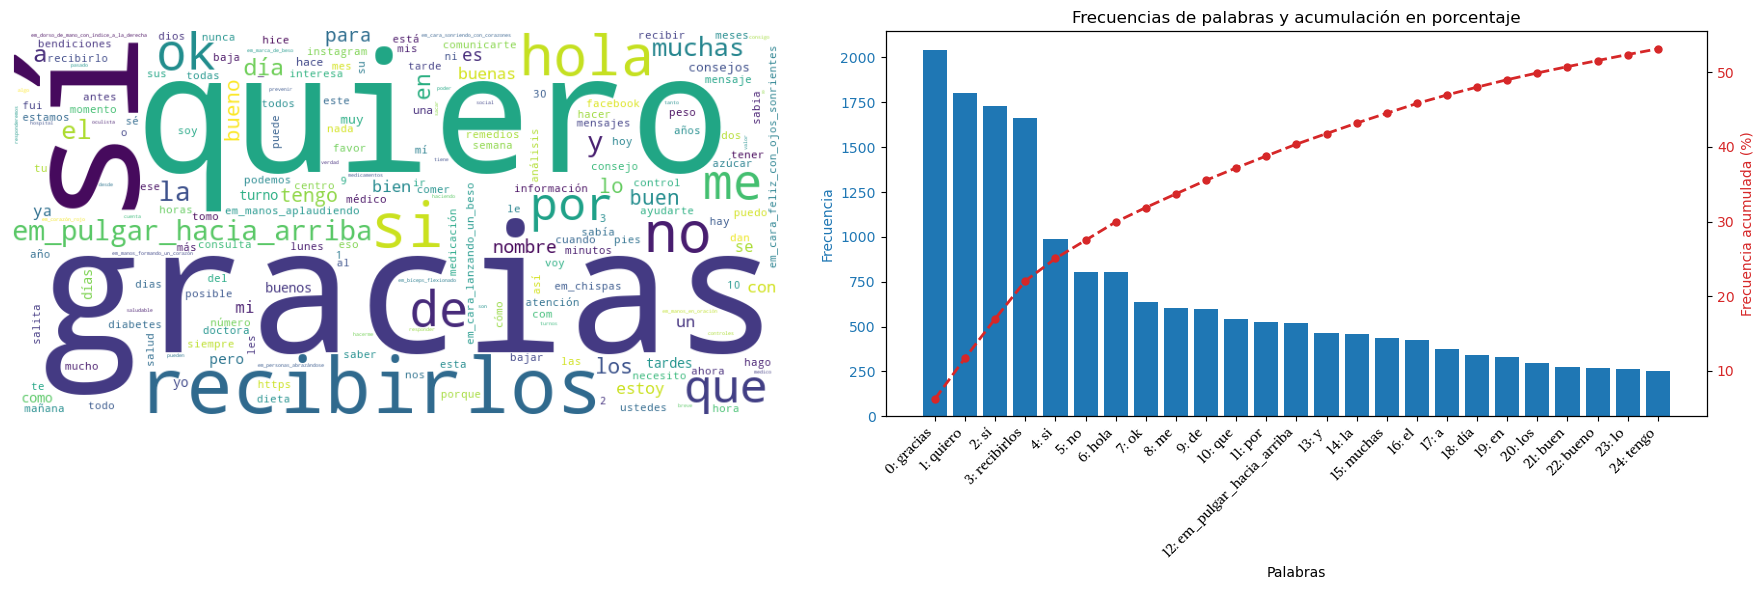

[('gracias', 2043),
 ('quiero', 1800),
 ('sí', 1728),
 ('recibirlos', 1662),
 ('si', 986),
 ('no', 803),
 ('hola', 802),
 ('ok', 636),
 ('me', 603),
 ('de', 596),
 ('que', 545),
 ('por', 525),
 ('em_pulgar_hacia_arriba', 519),
 ('y', 467),
 ('la', 461),
 ('muchas', 435),
 ('el', 427),
 ('a', 376),
 ('día', 344),
 ('en', 328),
 ('los', 296),
 ('buen', 277),
 ('bueno', 269),
 ('lo', 264),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('es', 201),
 ('con', 183),
 ('estoy', 176),
 ('bien', 171),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('yo', 111),
 ('como', 111),
 ('muy', 91),
 ('consejos', 91),
 ('una', 84),
 ('hace', 83),
 ('información', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('este', 73),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('al', 69),
 ('hacer', 69),
 ('análisis', 68),
 ('sabía', 67),
 ('más', 63),
 ('las', 63),
 ('te', 62),
 

In [244]:
mostrar_conteo(df,'recibido_corregido_sin_emoticones')

In [245]:
# diccionario para darle significado a los emoticones
significados_emoticones = {
'em_aceituna': 'aceituna',
'em_advertencia': 'advertencia',
'em_arcoíris': 'divesidad',
'em_batería_baja': 'cansancio',
'em_botella_descorchada': 'brindar',
'em_botón_de_marca_de_verificación': 'verificado',
'em_botón_ok': 'ok',
'em_brócoli': 'brócoli',
'em_bíceps_flexionado': 'fuerza',
'em_calamar': 'calamar',
'em_caniche': 'caniche',
'em_cara_aguantándose_las_lágrimas': 'felicidad',
'em_cara_asombrada': 'asombro',
'em_cara_asustada': 'miedo',
'em_cara_babeando': 'tentación',
'em_cara_cabreada': 'enojo',
'em_cara_cansada': 'cansancio',
'em_cara_con_calor': 'acalorado',
'em_cara_con_frío': 'helado',
'em_cara_con_manos_abrazando': 'afecto',
'em_cara_con_mascarilla_médica': 'enfermedad',
'em_cara_con_ojos_en_blanco': 'frustración',
'em_cara_con_termómetro': 'enfermedad',
'em_cara_de_confusión': 'confusión',
'em_cara_de_empollón': 'felicidad',
'em_cara_de_fiesta': 'felicidad',
'em_cara_de_sueño': 'sueño',
'em_cara_de_vaca': 'cara_de_vaca',
'em_cara_decepcionada': 'decepción',
'em_cara_derritiéndose': 'vergüenza',
'em_cara_desanimada': 'desánimo',
'em_cara_estornudando': 'enfermedad',
'em_cara_feliz_con_ojos_sonrientes': 'felicidad',
'em_cara_gritando_de_miedo': 'miedo',
'em_cara_guiñando_el_ojo': 'complicidad',
'em_cara_lanzando_un_beso': 'beso',
'em_cara_llorando_de_risa': 'alegría',
'em_cara_llorando_fuerte': 'tristeza',
'em_cara_pensativa': 'pensar',
'em_cara_radiante_con_ojos_sonrientes': 'felicidad',
'em_cara_resoplando': 'enojo',
'em_cara_revolviéndose_de_la_risa': 'felicidad',
'em_cara_saludando': 'saludo',
'em_cara_sonriendo_con_corazones': 'afecto',
'em_cara_sonriendo_con_estrellas': 'felicidad',
'em_cara_sonriendo_con_gafas_de_sol': 'felicidad',
'em_cara_sonriendo_con_ojos_de_corazón': 'felicidad',
'em_cara_sonriendo_con_ojos_grandes': 'felicidad',
'em_cara_sonriendo_con_ojos_sonrientes': 'felicidad',
'em_cara_sonriendo_con_sudor_frío': 'felicidad',
'em_cara_sonriendo_ligeramente': 'felicidad',
'em_cara_sonriente': 'felicidad',
'em_cara_sonriente_con_lágrima': 'felicidad',
'em_cara_sonrojada': 'vergüenza',
'em_cara_tapada_con_ojo_espiando': 'vergüenza',
'em_casa_con_jardín': 'casa',
'em_chincheta': 'chinche',
'em_chispas': 'chispas',
'em_coche': 'auto',
'em_colisión': 'colisión',
'em_copas_brindando': 'festejo',
'em_corazones_giratorios': 'afecto',
'em_corazón_azul_claro': 'afecto',
'em_corazón_con_flecha': 'afecto',
'em_corazón_latiendo': 'afecto',
'em_corazón_morado': 'afecto',
'em_corazón_rojo': 'afecto',
'em_corazón_rosa': 'afecto',
'em_corazón_vendado': 'recuperación',
'em_cuaderno_de_notas': 'anotar',
'em_dorso_de_mano_con_índice_a_la_derecha': 'señalar',
'em_dorso_de_mano_con_índice_a_la_izquierda': 'señalar',
'em_dorso_de_mano_con_índice_hacia_arriba': 'señalar',
'em_dorso_de_mano_con_índice_hacia_abajo': 'señalar',
'em_dos_corazones': 'afecto',
'em_dónut': 'dona',
'em_espiga_de_maíz': 'maíz',
'em_estetoscopio': 'estetoscopio',
'em_exclamación_de_corazón': 'afecto',
'em_exclamación_doble': 'importante',
'em_flecha_hacia_la_derecha': 'señalar',
'em_flor_de_cerezo': 'flor',
'em_fresa': 'fresa',
'em_fuego': 'fuego',
'em_girasol': 'girasol',
'em_globo_terráqueo_mostrando_américa': 'mundo',
'em_gota': 'gota',
'em_gotas_de_sudor': 'gotas',
'em_hierba': 'hierba',
'em_hoja_de_arce': 'hoja',
'em_hombre_haciendo_una_reverencia': 'respeto',
'em_hombre_sordo': 'sordera',
'em_huellas_de_pies': 'seguir',
'em_jeringuilla': 'jeringa',
'em_magdalena': 'magdalena',
'em_mandarina': 'mandarina',
'em_mano_escribiendo': 'anotar',
'em_mano_saludando': 'saludo',
'em_manos_aplaudiendo': 'aplausos',
'em_manos_en_oración': 'deseo',
'em_manos_formando_un_corazón': 'afecto',
'em_manos_levantadas_celebrando': 'celebración',
'em_marca_de_beso': 'beso',
'em_mate': 'mate',
'em_mono_con_los_ojos_tapados': 'evitar',
'em_mujer_con_la_mano_levantada': 'saludo',
'em_mujer_corriendo': 'ejercicio',
'em_mujer_encogida_de_hombros': 'desconcierto',
'em_ojos': 'asombro',
'em_oreja_con_audífono': 'sordera',
'em_paloma': 'paloma',
'em_panda': 'panda',
'em_pareja_enamorada': 'amor',
'em_pera': 'pera',
'em_persona_con_la_mano_en_la_frente': 'frustración',
'em_persona_con_la_mano_levantada': 'saludo',
'em_persona_en_la_cama': 'enfermedad',
'em_personas_abrazándose': 'afecto',
'em_persona_haciendo_una_reverencia': 'respeto',
'em_persona_sorda': 'no entiendo',
'em_tirita': 'recuperación',
'em_persona_encogida_de_hombros': 'desconcierto',
'em_persona_corriendo': 'ejercicio',
'em_mujer': 'mujer',
'em_ordenador_portátil': 'computadora',
'em_pila': 'energía',
'em_pimiento': 'pimienta',
'em_profesional_de_la_tecnología_mujer': 'profesional',
'em_pulgar_hacia_abajo': 'rechazo',
'em_pulgar_hacia_arriba': 'aprobación',
'em_puño_hacia_la_derecha': 'saludo',
'em_puño_hacia_la_izquierda': 'saludo',
'em_rosa': 'rosa',
'em_saurópodo': 'saurópodo',
'em_scooter': 'motocicleta',
'em_señal_de_aprobación_con_la_mano': 'aprobación',
'em_sol': 'sol',
'em_símbolo_de_mareo': 'mareo',
'em_tarta_de_cumpleaños': 'torta',
'em_teléfono': 'teléfono',
'em_tomate': 'tomate',
'em_trozo_de_tarta': 'torta',
'em_trébol_de_cuatro_hojas': 'suerte',
'em_una_y_media': 'una y media',
'em_vaca': 'vaca',
'em_vaina': 'vaina',
'em_velero': 'velero',
'em_verdura_de_hoja_verde': 'verdura',
'em_zorro': 'zorro'
}

# este diccionario se aplicará en pasos subsiguientes usando la siguiente función
def aplicar_significado_emoticones(line, significados_emoticones):
    palabras = re.findall(r'\b\w+\b', line.lower())
    resultado = []
    for palabra in palabras:
        if palabra in significados_emoticones.keys():
            resultado.append(significados_emoticones[palabra])
        else:
            resultado.append(palabra)
    return ' '.join(resultado)

print("Emoticones por significado:")
significados_emoticones_por_significado = {}
for emoticon in significados_emoticones:
    if significados_emoticones[emoticon] not in significados_emoticones_por_significado.keys():
        significados_emoticones_por_significado[significados_emoticones[emoticon]] = []
    significados_emoticones_por_significado[significados_emoticones[emoticon]].append(emoticon + ": " + emoji_es[re.sub("em_",":",emoticon)+":"])
significados_emoticones_por_significado

Emoticones por significado:


{'aceituna': ['em_aceituna: 🫒'],
 'advertencia': ['em_advertencia: ⚠'],
 'divesidad': ['em_arcoíris: 🌈'],
 'cansancio': ['em_batería_baja: \U0001faab', 'em_cara_cansada: 😫'],
 'brindar': ['em_botella_descorchada: 🍾'],
 'verificado': ['em_botón_de_marca_de_verificación: ✅'],
 'ok': ['em_botón_ok: 🆗'],
 'brócoli': ['em_brócoli: 🥦'],
 'fuerza': ['em_bíceps_flexionado: 💪'],
 'calamar': ['em_calamar: 🦑'],
 'caniche': ['em_caniche: 🐩'],
 'felicidad': ['em_cara_aguantándose_las_lágrimas: \U0001f979',
  'em_cara_de_empollón: 🤓',
  'em_cara_de_fiesta: 🥳',
  'em_cara_feliz_con_ojos_sonrientes: 😊',
  'em_cara_radiante_con_ojos_sonrientes: 😁',
  'em_cara_revolviéndose_de_la_risa: 🤣',
  'em_cara_sonriendo_con_estrellas: 🤩',
  'em_cara_sonriendo_con_gafas_de_sol: 😎',
  'em_cara_sonriendo_con_ojos_de_corazón: 😍',
  'em_cara_sonriendo_con_ojos_grandes: 😃',
  'em_cara_sonriendo_con_ojos_sonrientes: 😄',
  'em_cara_sonriendo_con_sudor_frío: 😅',
  'em_cara_sonriendo_ligeramente: 🙂',
  'em_cara_sonriente: 

In [246]:
# aplicar significado de emoticones a corregido
df['recibido_corregido_significado_emoticones'] = df['recibido_corregido_sin_emoticones'].apply(aplicar_significado_emoticones, significados_emoticones = significados_emoticones)

print("Verificar si hay emoticones")
palabras_emoticones = [wf[0] for wf in contar_frecuencia_palabras(df,'recibido_corregido_significado_emoticones') if 'em_' in wf[0]]
if len(palabras_emoticones)==0:
    print("No quedan palabras con emoticones")
else:
    print(f"Quedan: {len(palabras_emoticones)}")
    for palabra_emoticon in palabras_emoticones:
        print(f"{palabra_emoticon}:",emoji_es[re.sub('em_',':',palabra_emoticon) + ':'])

Verificar si hay emoticones
No quedan palabras con emoticones


Frecuencias primeros 20: [('gracias', 2043), ('quiero', 1800), ('sí', 1728), ('recibirlos', 1662), ('si', 986), ('no', 813), ('hola', 802), ('ok', 639), ('me', 603), ('de', 596), ('que', 545), ('aprobación', 528), ('por', 525), ('y', 469), ('la', 461), ('muchas', 435), ('el', 427), ('a', 376), ('día', 344), ('en', 328)]
Frecuencias últimos 20: [('poniendo', 1), ('práctica', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('acción', 1), ('comunicaremos', 1), ('flor', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1)]
Cantidad de palabras totales: 32825
Cantidad de palabras únicas: 2907
Cantidad de palabras frecuencia <=3: 2240
Cantidad de palabras frecuencia =1: 1635


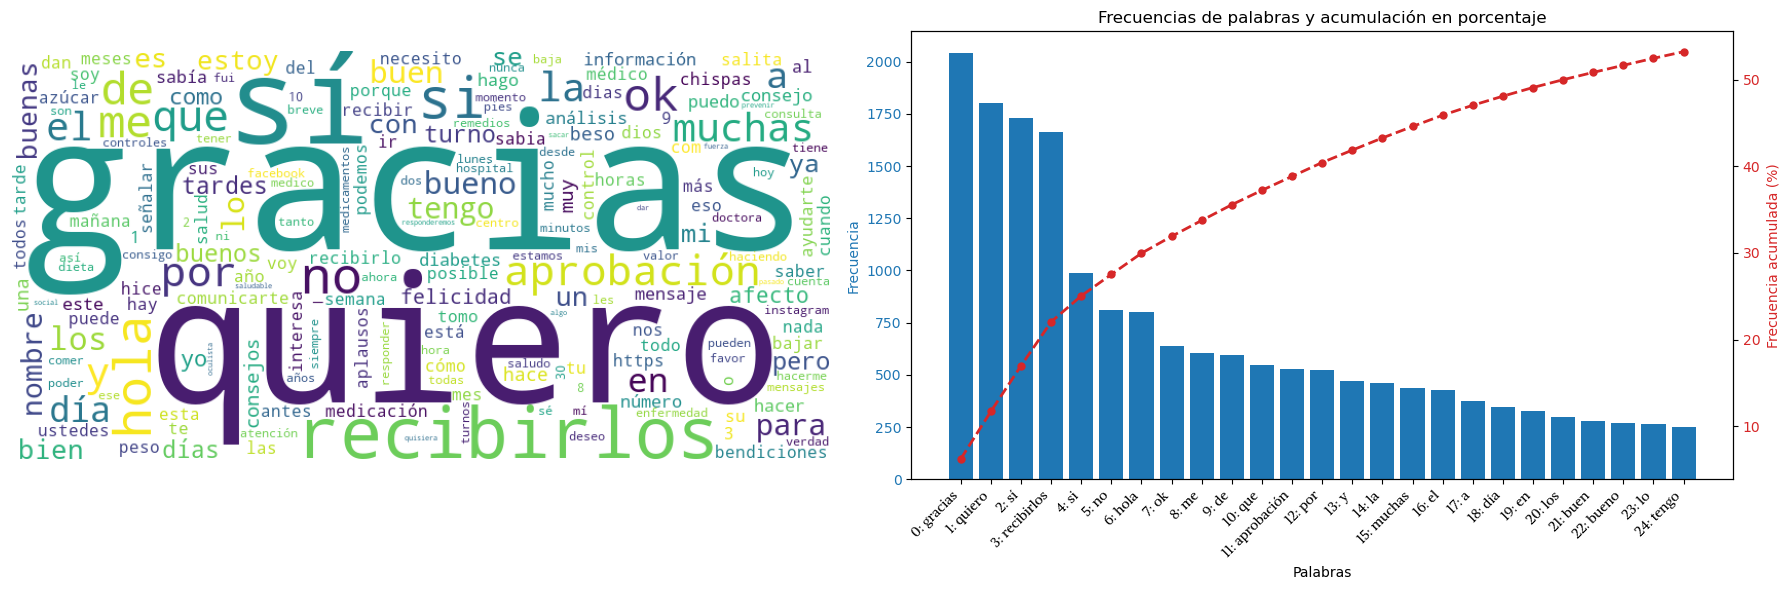

[('gracias', 2043),
 ('quiero', 1800),
 ('sí', 1728),
 ('recibirlos', 1662),
 ('si', 986),
 ('no', 813),
 ('hola', 802),
 ('ok', 639),
 ('me', 603),
 ('de', 596),
 ('que', 545),
 ('aprobación', 528),
 ('por', 525),
 ('y', 469),
 ('la', 461),
 ('muchas', 435),
 ('el', 427),
 ('a', 376),
 ('día', 344),
 ('en', 328),
 ('los', 296),
 ('buen', 277),
 ('bueno', 269),
 ('lo', 264),
 ('tengo', 251),
 ('para', 243),
 ('nombre', 221),
 ('es', 201),
 ('con', 183),
 ('estoy', 176),
 ('bien', 171),
 ('un', 166),
 ('buenas', 162),
 ('se', 147),
 ('mi', 142),
 ('ya', 141),
 ('pero', 132),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('yo', 111),
 ('como', 111),
 ('afecto', 105),
 ('felicidad', 97),
 ('muy', 91),
 ('consejos', 91),
 ('una', 86),
 ('hace', 83),
 ('beso', 81),
 ('información', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('este', 73),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('al', 69),
 ('hacer', 69),
 ('análisis', 68),
 ('sabía', 67),
 

In [247]:
mostrar_conteo(df,'recibido_corregido_significado_emoticones')

In [248]:
!pip install unidecode

Frecuencias primeros 20: [('si', 2714), ('gracias', 2045), ('quiero', 1801), ('recibirlos', 1662), ('no', 813), ('hola', 802), ('ok', 639), ('me', 603), ('de', 601), ('que', 555), ('aprobacion', 529), ('por', 525), ('y', 469), ('la', 462), ('muchas', 435), ('el', 428), ('a', 377), ('dia', 344), ('en', 328), ('los', 296)]
Frecuencias últimos 20: [('mediodia', 1), ('suspendieron', 1), ('poniendo', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('accion', 1), ('comunicaremos', 1), ('flor', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('wscribir', 1)]
Cantidad de palabras totales: 32825
Cantidad de palabras únicas: 2770
Cantidad de palabras frecuencia <=3: 2106
Cantidad de palabras frecuencia =1: 1532


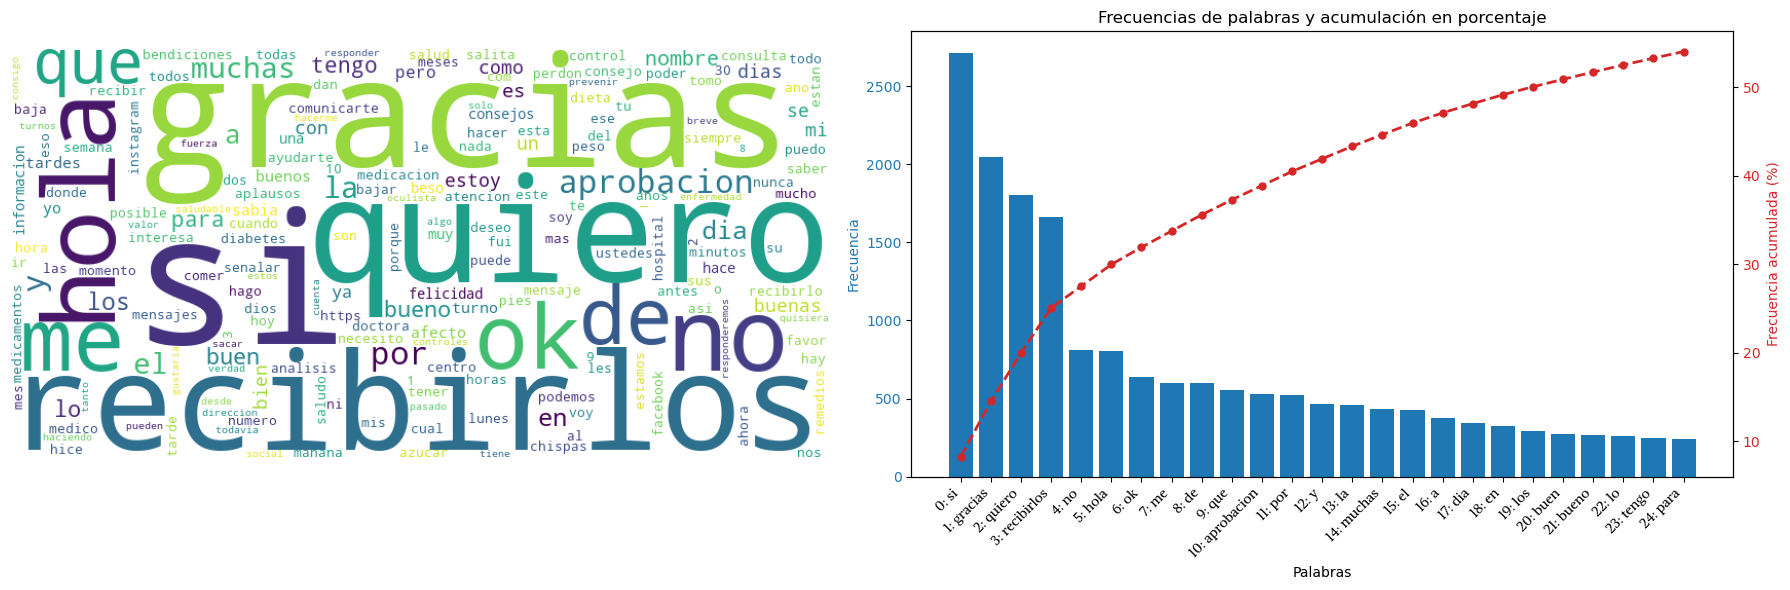

[('si', 2714),
 ('gracias', 2045),
 ('quiero', 1801),
 ('recibirlos', 1662),
 ('no', 813),
 ('hola', 802),
 ('ok', 639),
 ('me', 603),
 ('de', 601),
 ('que', 555),
 ('aprobacion', 529),
 ('por', 525),
 ('y', 469),
 ('la', 462),
 ('muchas', 435),
 ('el', 428),
 ('a', 377),
 ('dia', 344),
 ('en', 328),
 ('los', 296),
 ('buen', 277),
 ('bueno', 269),
 ('lo', 264),
 ('tengo', 251),
 ('para', 244),
 ('nombre', 221),
 ('es', 201),
 ('con', 183),
 ('estoy', 176),
 ('se', 174),
 ('bien', 171),
 ('como', 170),
 ('mi', 169),
 ('un', 166),
 ('buenas', 162),
 ('dias', 156),
 ('ya', 141),
 ('pero', 132),
 ('tardes', 122),
 ('turno', 120),
 ('buenos', 119),
 ('sabia', 114),
 ('yo', 111),
 ('afecto', 105),
 ('felicidad', 97),
 ('muy', 91),
 ('consejos', 91),
 ('una', 86),
 ('informacion', 85),
 ('hace', 84),
 ('beso', 81),
 ('esta', 75),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('este', 74),
 ('hago', 72),
 ('consejo', 70),
 ('numero', 70),
 ('al', 69),
 ('hacer', 69),
 ('analisis', 68),

In [249]:
from unidecode import unidecode

def quitar_tildes(texto):
    return unidecode(texto)

df['recibido_corregido_significado_emoticones_sin_tildes'] = df['recibido_corregido_significado_emoticones'].apply(quitar_tildes)

mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_tildes')

In [250]:
# STOPWORDS
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Frecuencias primeros 20: [('sí', 1728), ('no', 813), ('me', 603), ('de', 596), ('que', 545), ('por', 525), ('y', 469), ('la', 461), ('el', 427), ('a', 376), ('en', 328), ('los', 296), ('lo', 264), ('tengo', 251), ('para', 243), ('es', 201), ('con', 183), ('estoy', 176), ('un', 166), ('se', 147)]
Frecuencias últimos 20: [('entre', 1), ('sean', 1), ('tengamos', 1), ('tengas', 1), ('serían', 1), ('tendrás', 1), ('será', 1), ('estés', 1), ('algunas', 1), ('vuestros', 1), ('fuera', 1), ('estaban', 1), ('tendrán', 1), ('él', 1), ('ellos', 1), ('mío', 1), ('hubiese', 1), ('os', 1), ('estados', 1), ('siente', 1)]
Cantidad de palabras totales: 11525
Cantidad de palabras únicas: 149
Cantidad de palabras frecuencia <=3: 44
Cantidad de palabras frecuencia =1: 26


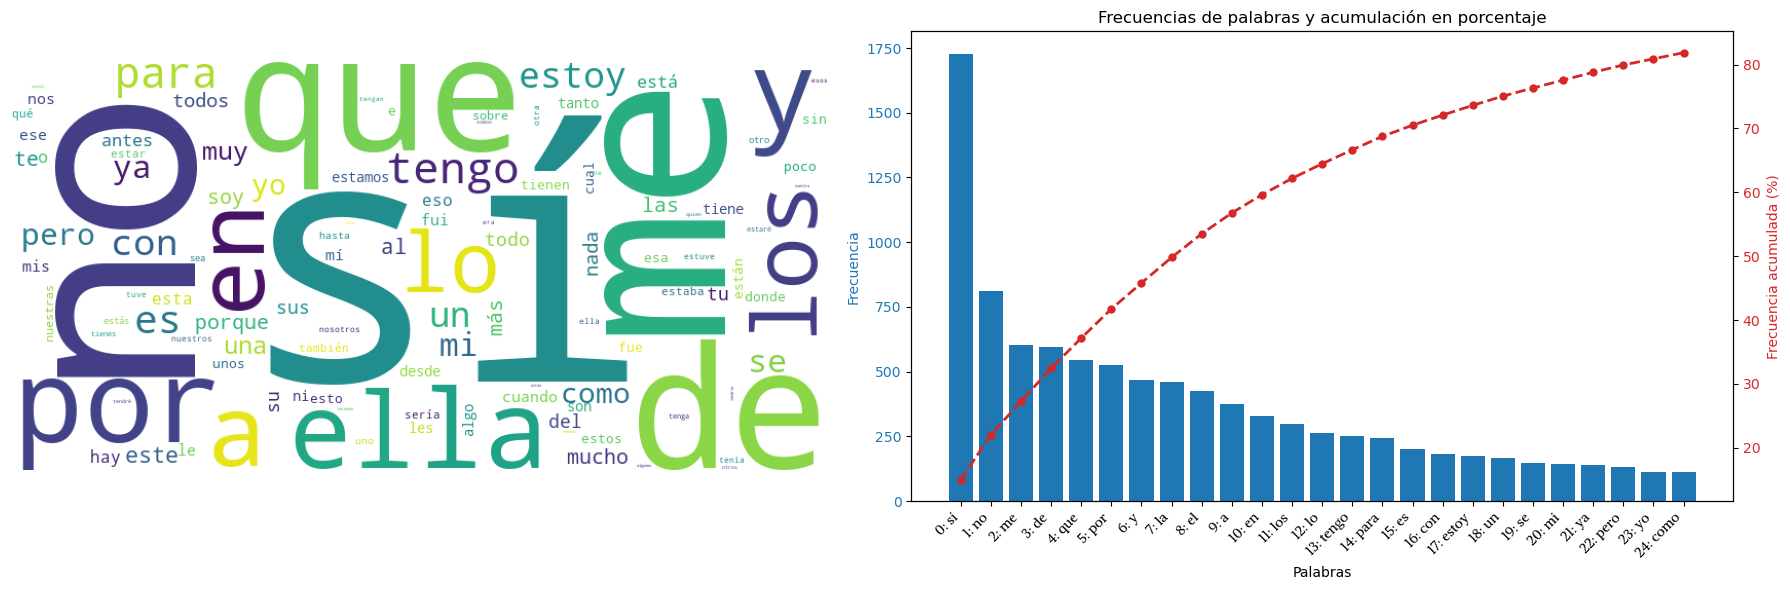

Frecuencias de palabras en stop_words
a: 376
al: 69
algo: 18
algunas: 1
algunos: 3
ante: 0
antes: 42
como: 111
con: 183
contra: 1
cual: 13
cuando: 32
de: 596
del: 47
desde: 20
donde: 14
durante: 0
e: 13
el: 427
ella: 7
ellas: 0
ellos: 1
en: 328
entre: 1
era: 5
erais: 0
eran: 2
eras: 0
eres: 0
es: 201
esa: 13
esas: 0
ese: 28
eso: 35
esos: 5
esta: 35
estaba: 10
estabais: 0
estaban: 1
estabas: 0
estad: 0
estada: 0
estadas: 0
estado: 1
estados: 1
estamos: 23
estando: 0
estar: 10
estaremos: 0
estará: 0
estarán: 0
estarás: 0
estaré: 6
estaréis: 0
estaría: 2
estaríais: 0
estaríamos: 0
estarían: 0
estarías: 0
estas: 3
este: 73
estemos: 0
esto: 14
estos: 16
estoy: 176
estuve: 7
estuviera: 0
estuvierais: 0
estuvieran: 0
estuvieras: 0
estuvieron: 0
estuviese: 0
estuvieseis: 0
estuviesen: 0
estuvieses: 0
estuvimos: 1
estuviste: 0
estuvisteis: 0
estuviéramos: 0
estuviésemos: 0
estuvo: 0
está: 40
estábamos: 0
estáis: 0
están: 16
estás: 8
esté: 0
estéis: 0
estén: 0
estés: 1
fue: 15
fuera: 1
fuerais: 

In [251]:
stop_words = sorted(nltk.corpus.stopwords.words('spanish'))

frecuencias = contar_frecuencia_palabras(df,'recibido_corregido_significado_emoticones')
frecuencias_dict = {wf[0]:wf[1] for wf in frecuencias}

mostrar_conteo(df,'recibido_corregido_significado_emoticones',palabras_incluir=stop_words)

print("Frecuencias de palabras en stop_words")
for palabra in stop_words:
    if palabra in frecuencias_dict.keys():
        print(palabra + ": " + str(frecuencias_dict[palabra]))
    else:
        print(palabra + ": 0")



In [252]:
# las palabras "sí" y "no" son muy importants porque determinan el sentido de muchas respuestas por lo que no se las puede inclui ren stopwords
# La palabra "ya" puede denotar algo que ya se hizo, por ejemplo un análisis
# Otras palabras a quitar de stop words por conocer el contexto: "sin", "muy", "cuando", "donde", "hay", "qué", "nada", "muchos", "soy", "fui", "tengo", "tuve"

palabras_excluir = ['si','sí','no','ya','sin', 'muy', 'cuando', 'donde', 'hay', 'qué', 'nada', 'muchos', 'soy', 'fui', 'tengo', 'tuve','ni']
for palabra in palabras_excluir:
    if palabra in stop_words:
        stop_words.remove(palabra)
        print(f'{palabra} removida')

def quitar_stop_words(line, stop_words):
    palabras = re.findall(r'\b\w+\b', line.lower())
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return ' '.join(palabras)


sí removida
no removida
ya removida
sin removida
muy removida
cuando removida
donde removida
hay removida
qué removida
nada removida
muchos removida
soy removida
fui removida
tengo removida
tuve removida
ni removida


Frecuencias primeros 20: [('gracias', 2043), ('quiero', 1800), ('sí', 1728), ('recibirlos', 1662), ('si', 986), ('no', 813), ('hola', 802), ('ok', 639), ('aprobación', 528), ('muchas', 435), ('día', 344), ('buen', 277), ('bueno', 269), ('tengo', 251), ('nombre', 221), ('bien', 171), ('buenas', 162), ('ya', 141), ('tardes', 122), ('días', 120)]
Frecuencias últimos 20: [('poniendo', 1), ('práctica', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('acción', 1), ('comunicaremos', 1), ('flor', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1)]
Cantidad de palabras totales: 24605
Cantidad de palabras únicas: 2774
Cantidad de palabras frecuencia <=3: 2197
Cantidad de palabras frecuencia =1: 1609


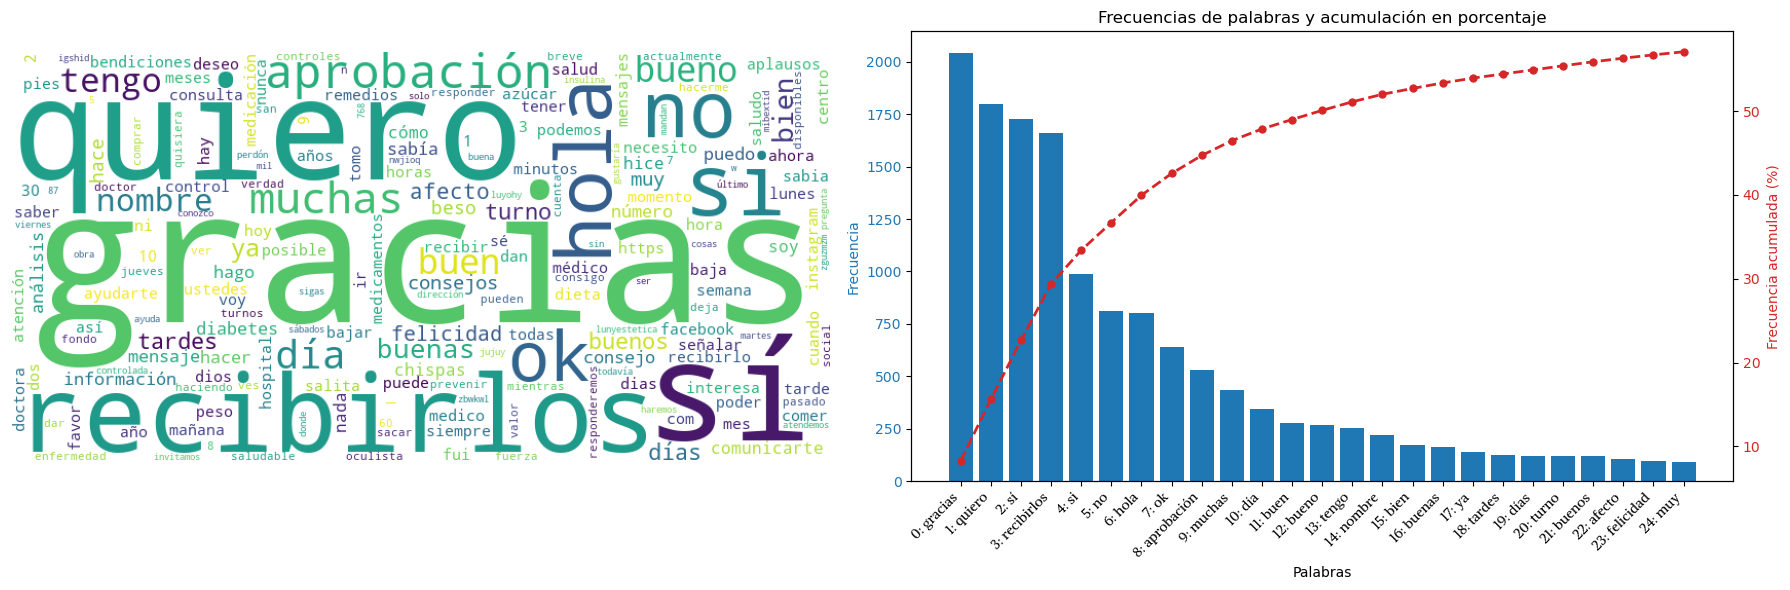

[('gracias', 2043),
 ('quiero', 1800),
 ('sí', 1728),
 ('recibirlos', 1662),
 ('si', 986),
 ('no', 813),
 ('hola', 802),
 ('ok', 639),
 ('aprobación', 528),
 ('muchas', 435),
 ('día', 344),
 ('buen', 277),
 ('bueno', 269),
 ('tengo', 251),
 ('nombre', 221),
 ('bien', 171),
 ('buenas', 162),
 ('ya', 141),
 ('tardes', 122),
 ('días', 120),
 ('turno', 120),
 ('buenos', 119),
 ('afecto', 105),
 ('felicidad', 97),
 ('muy', 91),
 ('consejos', 91),
 ('hace', 83),
 ('beso', 81),
 ('información', 76),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('hago', 72),
 ('consejo', 70),
 ('número', 70),
 ('hacer', 69),
 ('análisis', 68),
 ('sabía', 67),
 ('cómo', 59),
 ('soy', 58),
 ('comunicarte', 58),
 ('chispas', 58),
 ('_', 57),
 ('nada', 54),
 ('hice', 52),
 ('voy', 48),
 ('control', 48),
 ('sabia', 47),
 ('podemos', 47),
 ('año', 46),
 ('salud', 45),
 ('3', 44),
 ('meses', 44),
 ('horas', 44),
 ('aplausos', 42),
 ('ayudarte', 40),
 ('https', 39),
 ('señalar', 39),
 ('necesito', 38),
 ('ben

In [253]:
df['recibido_corregido_significado_emoticones_sin_stop_words'] = df['recibido_corregido_significado_emoticones'].apply(quitar_stop_words, stop_words = stop_words)

mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_stop_words')

Frecuencias primeros 20: [('si', 2715), ('gracias', 2045), ('quiero', 1801), ('recibirlos', 1662), ('no', 813), ('hola', 802), ('ok', 639), ('aprobacion', 529), ('muchas', 435), ('dia', 344), ('buen', 277), ('bueno', 269), ('tengo', 251), ('nombre', 221), ('bien', 171), ('buenas', 162), ('dias', 156), ('ya', 141), ('tardes', 122), ('turno', 120)]
Frecuencias últimos 20: [('mediodia', 1), ('suspendieron', 1), ('poniendo', 1), ('baile', 1), ('intento', 1), ('pasas', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('accion', 1), ('comunicaremos', 1), ('flor', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('wscribir', 1)]
Cantidad de palabras totales: 24616
Cantidad de palabras únicas: 2658
Cantidad de palabras frecuencia <=3: 2075
Cantidad de palabras frecuencia =1: 1512


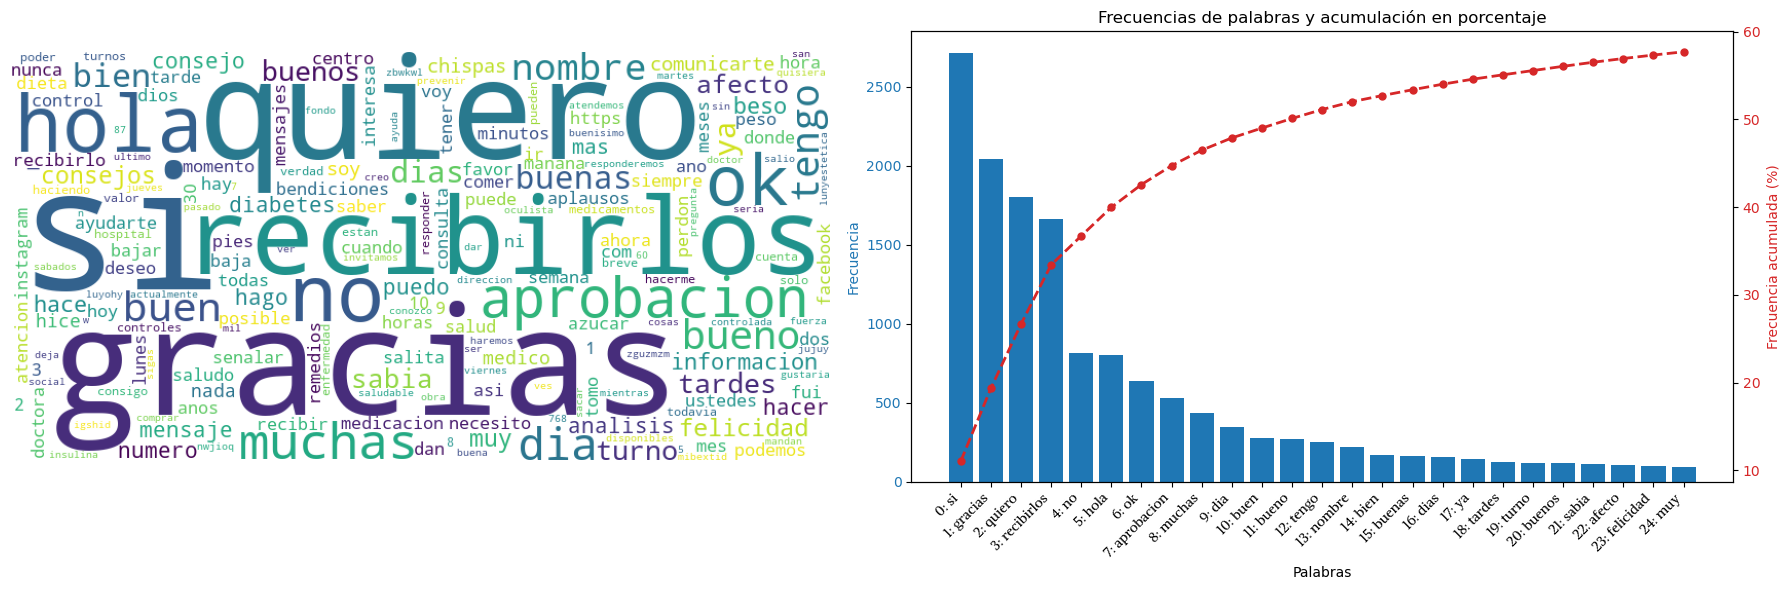

[('si', 2715),
 ('gracias', 2045),
 ('quiero', 1801),
 ('recibirlos', 1662),
 ('no', 813),
 ('hola', 802),
 ('ok', 639),
 ('aprobacion', 529),
 ('muchas', 435),
 ('dia', 344),
 ('buen', 277),
 ('bueno', 269),
 ('tengo', 251),
 ('nombre', 221),
 ('bien', 171),
 ('buenas', 162),
 ('dias', 156),
 ('ya', 141),
 ('tardes', 122),
 ('turno', 120),
 ('buenos', 119),
 ('sabia', 114),
 ('afecto', 105),
 ('felicidad', 97),
 ('muy', 91),
 ('consejos', 91),
 ('informacion', 85),
 ('hace', 84),
 ('beso', 81),
 ('diabetes', 75),
 ('mensaje', 75),
 ('puedo', 74),
 ('hago', 72),
 ('consejo', 70),
 ('numero', 70),
 ('hacer', 69),
 ('analisis', 68),
 ('mas', 63),
 ('soy', 58),
 ('comunicarte', 58),
 ('chispas', 58),
 ('_', 57),
 ('nada', 54),
 ('medico', 53),
 ('hice', 52),
 ('voy', 48),
 ('control', 48),
 ('podemos', 47),
 ('ano', 46),
 ('salud', 45),
 ('3', 44),
 ('meses', 44),
 ('horas', 44),
 ('aplausos', 42),
 ('ayudarte', 40),
 ('https', 39),
 ('necesito', 39),
 ('senalar', 39),
 ('bendiciones', 37

In [254]:
df['recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words'] = df['recibido_corregido_significado_emoticones_sin_tildes'].apply(quitar_stop_words, stop_words = stop_words)

mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words')

In [255]:
!pip install spacy
!python -m spacy download es_core_news_sm

# lematizar
import spacy
nlp = spacy.load("es_core_news_sm")


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.3/12.9 MB 10.9 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.9 MB 13.5 MB/s eta 0:00:01
     ----- ---------------------------------- 1.7/12.9 MB 13.2 MB/s eta 0:00:01
     ------- -------------------------------- 2.4/12.9 MB 15.5 MB/s eta 0:00:01
     --------- ------------------------------ 3.2/12.9 MB 14.4 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.9 MB 13.8 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.9 MB 12.1 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.9 MB 11.7 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.9 MB 11.6 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.9 MB 11.7 MB/s eta 0:00:01
     ----------------- ---------------------- 5.6/12.9 MB 11.9 MB/s eta 0:00:01
     -------------------- ------------------- 6.

Frecuencias primeros 20: [('querer', 1839), ('él', 1763), ('recibir', 1729), ('sí', 1726), ('gracias', 1426), ('si', 986), ('no', 817), ('holar', 722), ('ok', 639), ('gracia', 584), ('mucho', 538), ('aprobación', 528), ('día', 464), ('buen', 411), ('hacer', 346), ('tener', 285), ('bueno', 269), ('poder', 231), ('nombre', 220), ('bien', 171)]
Frecuencias últimos 20: [('joya', 1), ('husted', 1), ('mentable', 1), ('mediodía', 1), ('práctica', 1), ('baile', 1), ('intento', 1), ('pasa', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('león', 1), ('acción', 1), ('comunicarer', 1), ('flor', 1), ('enfermera', 1), ('co', 1), ('trol', 1), ('wscribir', 1)]
Cantidad de palabras totales: 26426
Cantidad de palabras únicas: 2420
Cantidad de palabras frecuencia <=3: 1905
Cantidad de palabras frecuencia =1: 1412


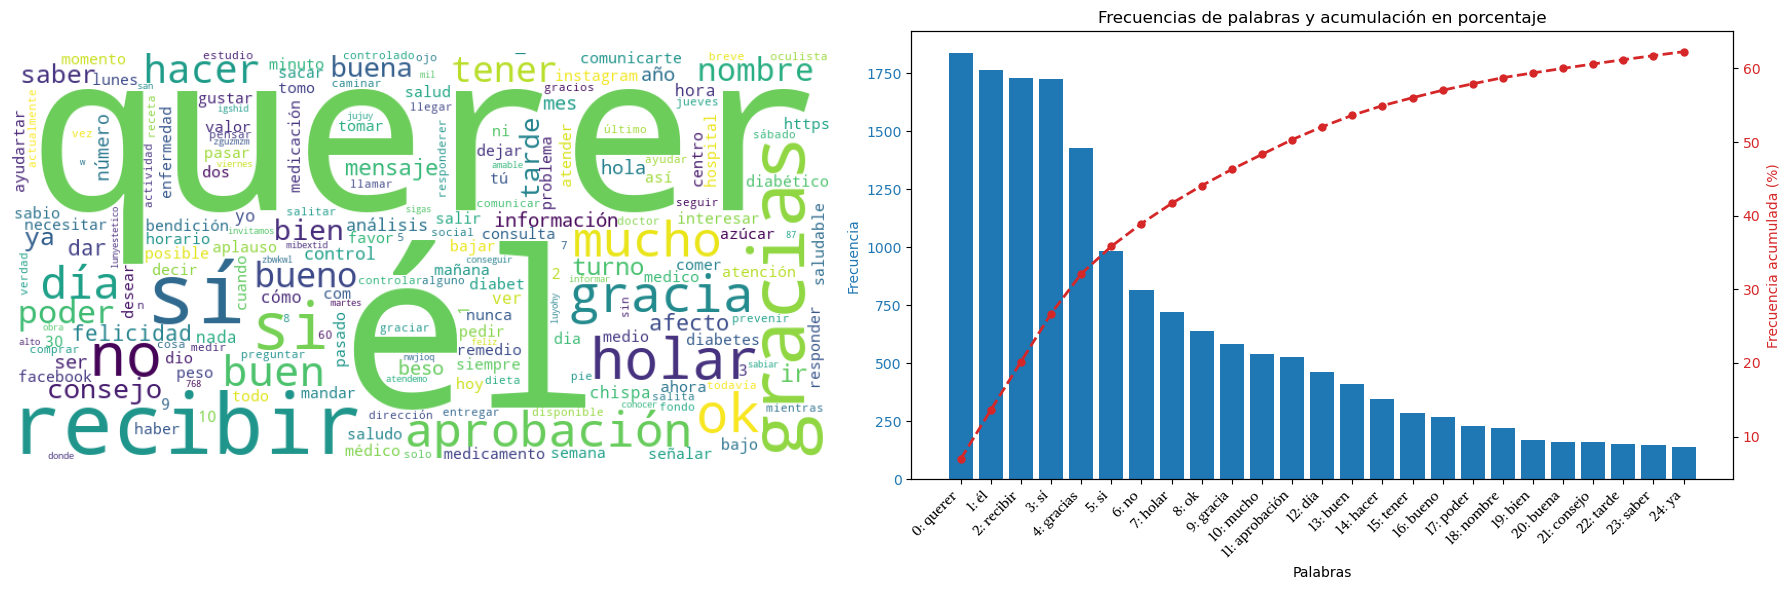

[('querer', 1839),
 ('él', 1763),
 ('recibir', 1729),
 ('sí', 1726),
 ('gracias', 1426),
 ('si', 986),
 ('no', 817),
 ('holar', 722),
 ('ok', 639),
 ('gracia', 584),
 ('mucho', 538),
 ('aprobación', 528),
 ('día', 464),
 ('buen', 411),
 ('hacer', 346),
 ('tener', 285),
 ('bueno', 269),
 ('poder', 231),
 ('nombre', 220),
 ('bien', 171),
 ('buena', 162),
 ('consejo', 159),
 ('tarde', 153),
 ('saber', 146),
 ('ya', 141),
 ('turno', 133),
 ('ir', 130),
 ('afecto', 105),
 ('mensaje', 104),
 ('dar', 99),
 ('felicidad', 98),
 ('beso', 81),
 ('hola', 80),
 ('mes', 79),
 ('información', 76),
 ('ser', 76),
 ('año', 75),
 ('número', 71),
 ('análisis', 67),
 ('control', 67),
 ('yo', 63),
 ('_', 62),
 ('hora', 61),
 ('cómo', 59),
 ('chispa', 57),
 ('ver', 56),
 ('nada', 54),
 ('diabet', 50),
 ('tú', 47),
 ('comunicarte', 47),
 ('salud', 45),
 ('3', 44),
 ('aplauso', 42),
 ('médico', 41),
 ('necesitar', 40),
 ('https', 39),
 ('señalar', 39),
 ('bajar', 38),
 ('tomar', 38),
 ('bendición', 38),
 ('hab

In [256]:
def lematizar(line):
    doc = nlp(line)
    return ' '.join([token.lemma_ for token in doc])

df['recibido_corregido_significado_emoticones_sin_stop_words_lematizada'] = df['recibido_corregido_significado_emoticones_sin_stop_words'].apply(lematizar)
mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_stop_words_lematizada')

Frecuencias primeros 20: [('si', 2715), ('querer', 1830), ('él', 1757), ('recibir', 1727), ('gracias', 1388), ('no', 818), ('holar', 711), ('ok', 639), ('gracia', 632), ('mucho', 538), ('aprobacion', 529), ('buen', 405), ('hacer', 340), ('dia', 332), ('tener', 286), ('bueno', 269), ('nombre', 220), ('poder', 208), ('bien', 171), ('buena', 162)]
Frecuencias últimos 20: [('mediodia', 1), ('cuidandome', 1), ('practica', 1), ('baile', 1), ('intento', 1), ('pasa', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('león', 1), ('accion', 1), ('comunicarer', 1), ('flor', 1), ('tendrio', 1), ('enfermera', 1), ('co', 1), ('trol', 1), ('realizo', 1), ('wscribir', 1)]
Cantidad de palabras totales: 26427
Cantidad de palabras únicas: 2399
Cantidad de palabras frecuencia <=3: 1860
Cantidad de palabras frecuencia =1: 1382


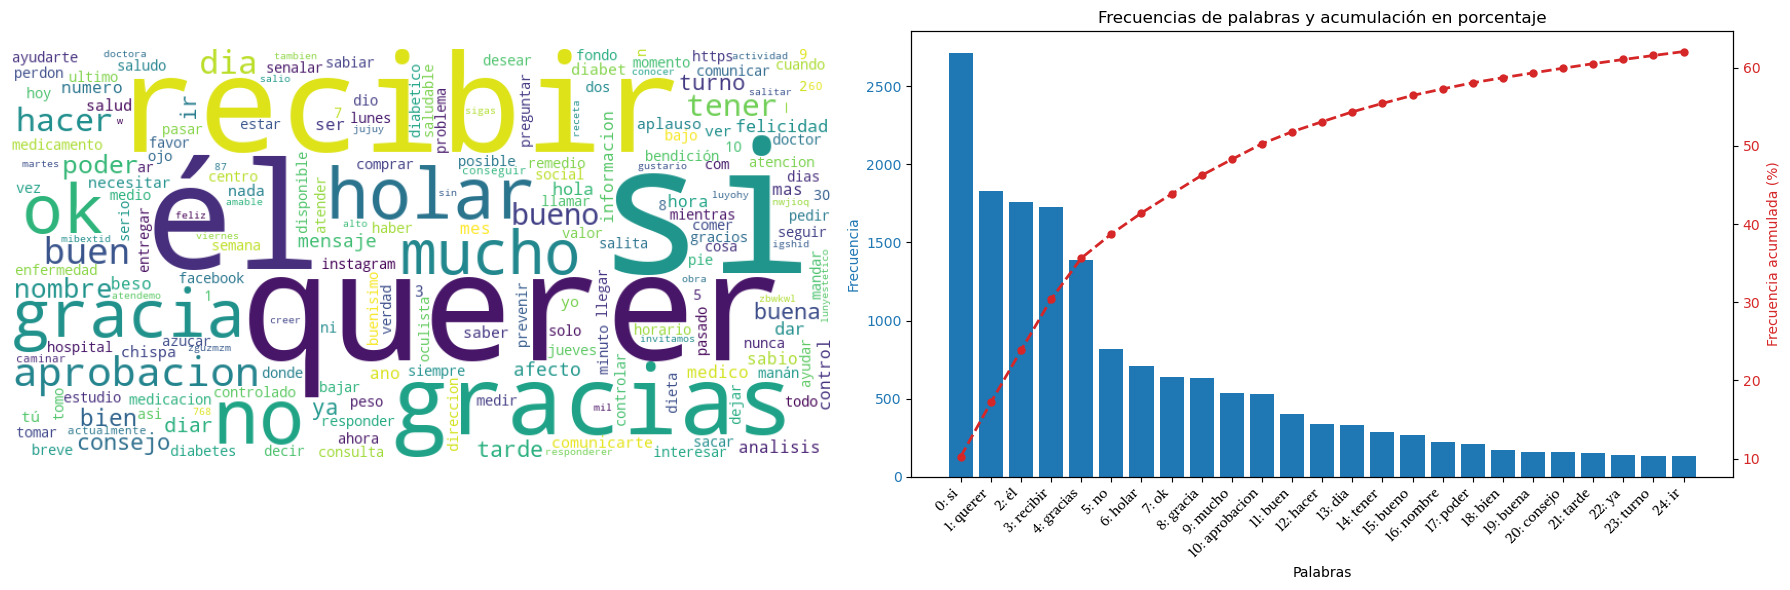

[('si', 2715),
 ('querer', 1830),
 ('él', 1757),
 ('recibir', 1727),
 ('gracias', 1388),
 ('no', 818),
 ('holar', 711),
 ('ok', 639),
 ('gracia', 632),
 ('mucho', 538),
 ('aprobacion', 529),
 ('buen', 405),
 ('hacer', 340),
 ('dia', 332),
 ('tener', 286),
 ('bueno', 269),
 ('nombre', 220),
 ('poder', 208),
 ('bien', 171),
 ('buena', 162),
 ('consejo', 160),
 ('tarde', 153),
 ('ya', 141),
 ('turno', 135),
 ('ir', 132),
 ('diar', 125),
 ('afecto', 105),
 ('mensaje', 104),
 ('felicidad', 98),
 ('dar', 95),
 ('hola', 91),
 ('informacion', 85),
 ('beso', 81),
 ('mes', 79),
 ('ano', 76),
 ('ser', 76),
 ('sabio', 75),
 ('numero', 71),
 ('analisis', 68),
 ('control', 68),
 ('medico', 66),
 ('_', 62),
 ('hora', 61),
 ('mas', 60),
 ('saber', 56),
 ('ver', 56),
 ('chispa', 56),
 ('nada', 54),
 ('yo', 51),
 ('diabet', 49),
 ('tú', 48),
 ('comunicarte', 46),
 ('salud', 45),
 ('3', 44),
 ('aplauso', 42),
 ('necesitar', 42),
 ('https', 39),
 ('senalar', 39),
 ('bajar', 38),
 ('haber', 37),
 ('asi', 3

In [257]:
df['recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada'] = df['recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words'].apply(lematizar)

mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada')

In [258]:
# STEMMER
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
stemmer = SnowballStemmer('spanish')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Frecuencias primeros 20: [('si', 2714), ('graci', 2044), ('quier', 1809), ('recib', 1737), ('buen', 842), ('no', 813), ('hol', 803), ('ok', 639), ('aprob', 530), ('much', 447), ('dia', 344), ('teng', 253), ('nombr', 221), ('hac', 209), ('bien', 172), ('consej', 161), ('dias', 156), ('tard', 153), ('ya', 141), ('turn', 140)]
Frecuencias últimos 20: [('28', 1), ('aa', 1), ('dartasu', 1), ('revision', 1), ('consultori', 1), ('nejamkin', 1), ('joy', 1), ('husted', 1), ('mentabl', 1), ('mediod', 1), ('conmig', 1), ('llamam', 1), ('empiec', 1), ('cesac', 1), ('leon', 1), ('accion', 1), ('enfermer', 1), ('co', 1), ('trol', 1), ('wscrib', 1)]
Cantidad de palabras totales: 24605
Cantidad de palabras únicas: 1950
Cantidad de palabras frecuencia <=3: 1434
Cantidad de palabras frecuencia =1: 1005


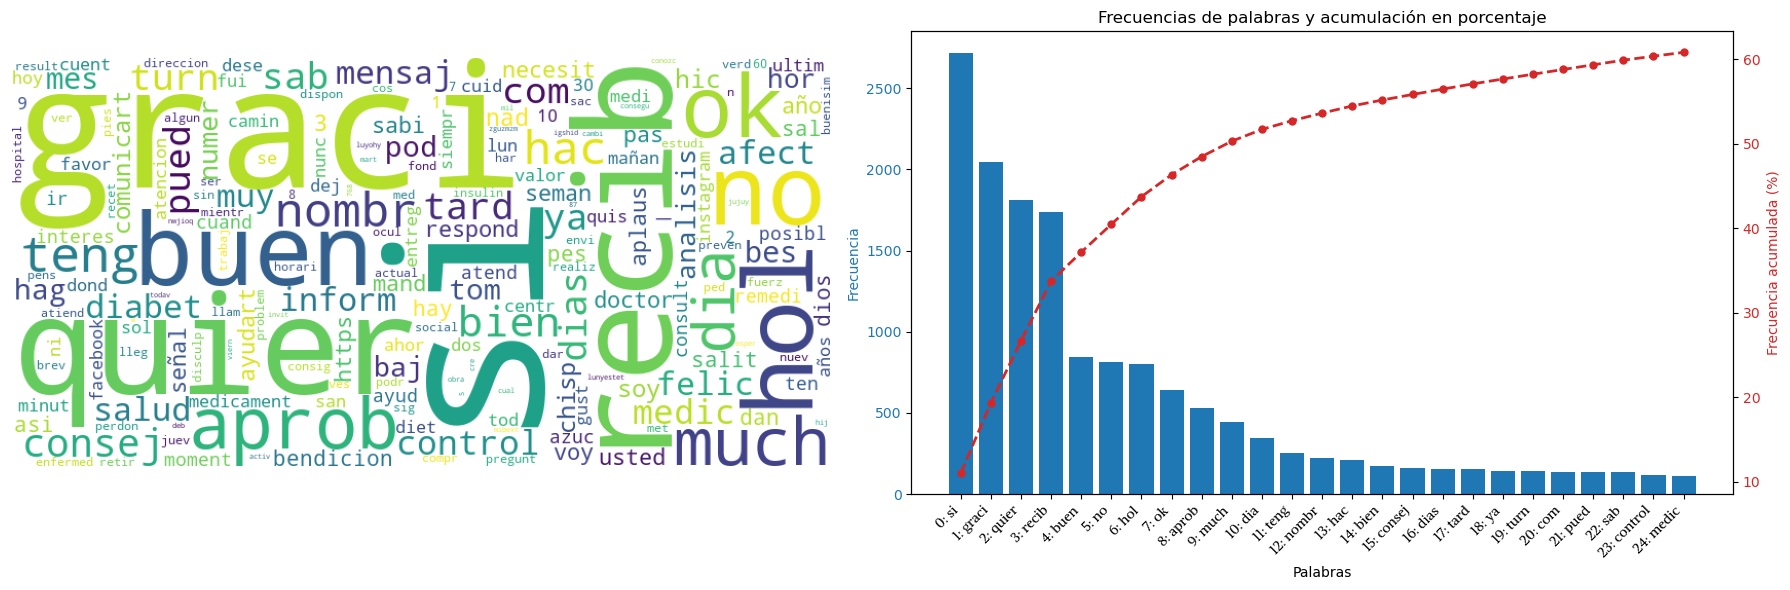

[('si', 2714),
 ('graci', 2044),
 ('quier', 1809),
 ('recib', 1737),
 ('buen', 842),
 ('no', 813),
 ('hol', 803),
 ('ok', 639),
 ('aprob', 530),
 ('much', 447),
 ('dia', 344),
 ('teng', 253),
 ('nombr', 221),
 ('hac', 209),
 ('bien', 172),
 ('consej', 161),
 ('dias', 156),
 ('tard', 153),
 ('ya', 141),
 ('turn', 140),
 ('com', 138),
 ('pued', 136),
 ('sab', 135),
 ('control', 115),
 ('medic', 112),
 ('afect', 107),
 ('inform', 106),
 ('mensaj', 104),
 ('diabet', 104),
 ('salud', 102),
 ('felic', 100),
 ('muy', 91),
 ('mes', 81),
 ('bes', 81),
 ('pod', 78),
 ('hag', 77),
 ('tom', 75),
 ('numer', 71),
 ('baj', 71),
 ('analisis', 68),
 ('hor', 68),
 ('hic', 61),
 ('soy', 58),
 ('comunicart', 58),
 ('chisp', 58),
 ('_', 57),
 ('nad', 54),
 ('pas', 48),
 ('sabi', 48),
 ('voy', 48),
 ('respond', 48),
 ('mand', 47),
 ('año', 46),
 ('usted', 45),
 ('3', 44),
 ('necesit', 44),
 ('aplaus', 42),
 ('doctor', 41),
 ('ayudart', 40),
 ('https', 39),
 ('señal', 39),
 ('seman', 38),
 ('bendicion', 38),

In [259]:
def stematizar(line):
    tokens = word_tokenize(line)
    return ' '.join([stemmer.stem(token) for token in tokens])

df['recibido_corregido_significado_emoticones_sin_stop_words_stemetizada'] = df['recibido_corregido_significado_emoticones_sin_stop_words'].apply(stematizar)
mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_stop_words_stemetizada')

Frecuencias primeros 20: [('si', 2715), ('graci', 2046), ('quier', 1810), ('recib', 1735), ('buen', 842), ('no', 813), ('hol', 803), ('ok', 639), ('aprob', 530), ('much', 447), ('dia', 344), ('teng', 253), ('nombr', 221), ('hac', 210), ('bien', 172), ('consej', 161), ('dias', 156), ('tard', 153), ('ya', 141), ('turn', 140)]
Frecuencias últimos 20: [('28', 1), ('aa', 1), ('dartasu', 1), ('revision', 1), ('consultori', 1), ('nejamkin', 1), ('joy', 1), ('husted', 1), ('mentabl', 1), ('mediodi', 1), ('conmig', 1), ('llamam', 1), ('empiec', 1), ('cesac', 1), ('leon', 1), ('accion', 1), ('enfermer', 1), ('co', 1), ('trol', 1), ('wscrib', 1)]
Cantidad de palabras totales: 24616
Cantidad de palabras únicas: 1947
Cantidad de palabras frecuencia <=3: 1420
Cantidad de palabras frecuencia =1: 995


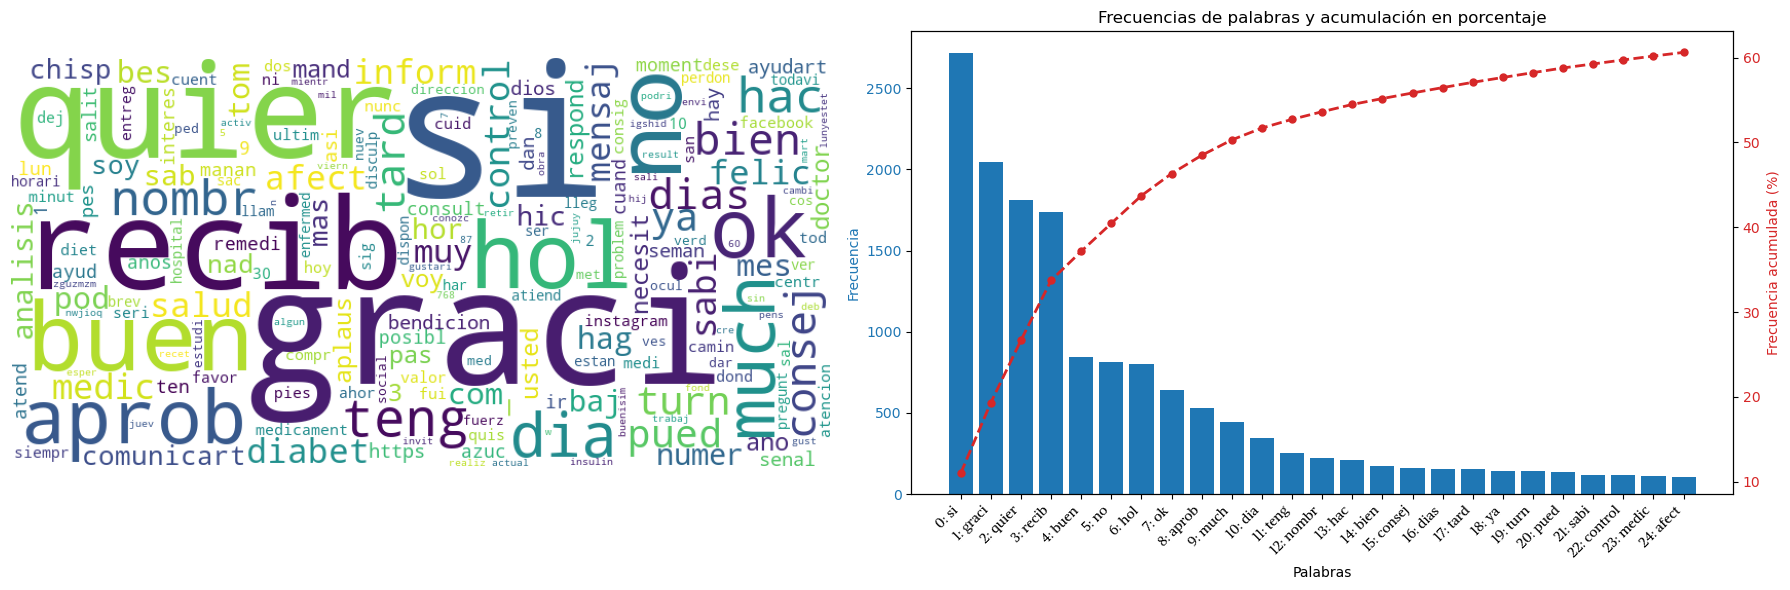

[('si', 2715),
 ('graci', 2046),
 ('quier', 1810),
 ('recib', 1735),
 ('buen', 842),
 ('no', 813),
 ('hol', 803),
 ('ok', 639),
 ('aprob', 530),
 ('much', 447),
 ('dia', 344),
 ('teng', 253),
 ('nombr', 221),
 ('hac', 210),
 ('bien', 172),
 ('consej', 161),
 ('dias', 156),
 ('tard', 153),
 ('ya', 141),
 ('turn', 140),
 ('pued', 136),
 ('sabi', 117),
 ('control', 116),
 ('medic', 112),
 ('afect', 107),
 ('inform', 106),
 ('mensaj', 104),
 ('diabet', 104),
 ('salud', 102),
 ('felic', 100),
 ('muy', 91),
 ('mes', 81),
 ('bes', 81),
 ('com', 79),
 ('hag', 77),
 ('pod', 75),
 ('tom', 74),
 ('numer', 71),
 ('baj', 71),
 ('analisis', 68),
 ('hor', 68),
 ('sab', 66),
 ('mas', 63),
 ('hic', 61),
 ('soy', 58),
 ('comunicart', 58),
 ('chisp', 58),
 ('_', 57),
 ('nad', 54),
 ('pas', 48),
 ('voy', 48),
 ('mand', 47),
 ('ano', 46),
 ('usted', 45),
 ('3', 44),
 ('necesit', 44),
 ('respond', 43),
 ('aplaus', 42),
 ('doctor', 41),
 ('ayudart', 40),
 ('https', 39),
 ('senal', 39),
 ('seman', 38),
 ('ben

In [260]:
df['recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada'] = df['recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words'].apply(stematizar)
mostrar_conteo(df,'recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada')

In [261]:
# conteo de cantidad de palabras por columna
campos_recibido = [column for column in df.columns if column not in ['id_participante', 'id_mensaje', 'enviado', 'tipo', 'subtipo', 'clase']]
cantidades = []
for campo in campos_recibido:
    print("")
    print(campo)
    frecuencias = contar_frecuencia_palabras(df, campo)
    totales = sum([wf[1] for wf in frecuencias])
    unicas = len(frecuencias)
    print(f"Cantidad de palabras totales: {totales}")
    print(f"Cantidad de palabras únicas: {unicas}")
    cantidades.append({'texto':campo,'palabras_totales':totales,'palabras_unicas':unicas})
df_cantidades=pd.DataFrame(cantidades)
pd.set_option('display.max_colwidth', None)
df_cantidades


recibido
Cantidad de palabras totales: 33141
Cantidad de palabras únicas: 3680

recibido_limpio
Cantidad de palabras totales: 33050
Cantidad de palabras únicas: 3115

recibido_corregido
Cantidad de palabras totales: 33083
Cantidad de palabras únicas: 2979

recibido_corregido_sin_emoticones
Cantidad de palabras totales: 32811
Cantidad de palabras únicas: 2973

recibido_corregido_significado_emoticones
Cantidad de palabras totales: 32825
Cantidad de palabras únicas: 2907

recibido_corregido_significado_emoticones_sin_tildes
Cantidad de palabras totales: 32825
Cantidad de palabras únicas: 2770

recibido_corregido_significado_emoticones_sin_stop_words
Cantidad de palabras totales: 24605
Cantidad de palabras únicas: 2774

recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words
Cantidad de palabras totales: 24616
Cantidad de palabras únicas: 2658

recibido_corregido_significado_emoticones_sin_stop_words_lematizada
Cantidad de palabras totales: 26426
Cantidad de palabras únicas: 

texto  \
0                                                                          recibido   
1                                                                   recibido_limpio   
2                                                                recibido_corregido   
3                                                 recibido_corregido_sin_emoticones   
4                                         recibido_corregido_significado_emoticones   
5                              recibido_corregido_significado_emoticones_sin_tildes   
6                          recibido_corregido_significado_emoticones_sin_stop_words   
7               recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words   
8               recibido_corregido_significado_emoticones_sin_stop_words_lematizada   
9    recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada   
10             recibido_corregido_significado_emoticones_sin_stop_words_stemetizada   
11  recibido_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada   

    palabras_totales  palabras_unicas  
0              33141             3680  
1              33050             3115  
2              33083             2979  
3              32811             2973  
4              32825             2907  
5              32825             2770  
6              24605             2774  
7              24616             2658  
8              26426             2420  
9              26427             2399  
10             24605             1950  
11             24616             1947

In [283]:
# funcion para obtener distintas versiones a partir de un mensaje individual
def procesar_columna(df, columna = 0, agrupamiento_emojis=agrupamiento_emojis, correcciones = correcciones, stop_words = stop_words,significados_emoticones = significados_emoticones, verbose=False):
    if columna == 0:
        columna = df.columns[0]
    if verbose:
        print(f"Limpiar -> {(columna + '_limpio')}")
    df[columna + "_limpio"] = df[columna].apply(separa_letra_numero).apply(puntuacion).apply(blank_line).apply(minuscula).apply(letras_repetidas).apply(espacios_dobles)

    if verbose:
        print(f"Corregir -> {(columna + '_corregido')}")
    df[columna + "_corregido"] = df[columna + "_limpio"].apply(aplicar_correcciones, correcciones = correcciones, prefijo = "\\b(", sufijo = ")\\b")

    if verbose:
        print(f"Emoticones -> {(columna + '_corregido_sin_emoticones')}")
    df[columna + "_corregido_sin_emoticones"] = df[columna + "_corregido"].apply(convertir_emoticones).apply(emoji_em).apply(aplicar_correcciones, correcciones = agrupamiento_emojis)

    if verbose:
        print(f"Significado emoticones -> {(columna + '_corregido_significado_emoticones')}")
    df[columna + "_corregido_significado_emoticones"] = df[columna + "_corregido_sin_emoticones"].apply(aplicar_significado_emoticones, significados_emoticones = significados_emoticones)

    if verbose:
        print(f"Quitar tildes -> {(columna + '_corregido_significado_emoticones_sin_tildes')}")
    df[columna + "_corregido_significado_emoticones_sin_tildes"] = df[columna + "_corregido_significado_emoticones"].apply(quitar_tildes)

    if verbose:
        print(f"Quitar stopwords -> {(columna + '_corregido_significado_emoticones_sin_stop_words')}")
    df[columna + "_corregido_significado_emoticones_sin_stop_words"] = df[columna + "_corregido_significado_emoticones"].apply(quitar_stop_words, stop_words = stop_words)

    if verbose:
        print(f"Quitar stopwords a sin tilde -> {(columna + '_corregido_significado_emoticones_sin_tildes_sin_stop_words')}")
    df[columna + "_corregido_significado_emoticones_sin_tildes_sin_stop_words"] = df[columna + "_corregido_significado_emoticones_sin_tildes"].apply(quitar_stop_words, stop_words = stop_words)

    if verbose:
        print(f"Lematizar (demora) -> {(columna + '_corregido_significado_emoticones_sin_stop_words_lematizada')}")
    df[columna + "_corregido_significado_emoticones_sin_stop_words_lematizada"] = df[columna + "_corregido_significado_emoticones_sin_stop_words"].apply(lematizar)

    if verbose:
        print(f"Lematizar sin tildes (demora) -> {(columna + '_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada')}")
    df[columna + "_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada"] = df[columna + "_corregido_significado_emoticones_sin_tildes_sin_stop_words"].apply(lematizar)

    if verbose:
        print(f"Stemmizar -> {(columna + '_corregido_significado_emoticones_sin_stop_words_stemetizada')}")
    df[columna + "_corregido_significado_emoticones_sin_stop_words_stemetizada"] = df[columna + "_corregido_significado_emoticones_sin_stop_words"].apply(stematizar)

    if verbose:
        print(f"Stemmizar sin tildes -> {(columna + '_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada')}")
    df[columna + "_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada"] = df[columna + "_corregido_significado_emoticones_sin_tildes_sin_stop_words"].apply(stematizar)


In [285]:
df_texto = pd.DataFrame({"texto":["Hla k tal, oy fui a la clínica 👏👏👏👏👏👏💪💪💪"]})
procesar_columna(df_texto, verbose=True)
df_texto

Limpiar -> texto_limpio
Corregir -> texto_corregido
Emoticones -> texto_corregido_sin_emoticones
Significado emoticones -> texto_corregido_significado_emoticones
Quitar tildes -> texto_corregido_significado_emoticones_sin_tildes
Quitar stopwords -> texto_corregido_significado_emoticones_sin_stop_words
Quitar stopwords a sin tilde -> texto_corregido_significado_emoticones_sin_tildes_sin_stop_words
Lematizar (demora) -> texto_corregido_significado_emoticones_sin_stop_words_lematizada
Lematizar sin tildes (demora) -> texto_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada
Stemmizar -> texto_corregido_significado_emoticones_sin_stop_words_stemetizada
Stemmizar sin tildes -> texto_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada


texto                      texto_limpio  \
0  Hla k tal, oy fui a la clínica 👏👏👏👏👏👏💪💪💪  hla k tal oy fui a la clínica 👏💪   

                        texto_corregido  \
0  hola que tal hoy fui a la clínica 👏💪   

                                                   texto_corregido_sin_emoticones  \
0  hola que tal hoy fui a la clínica  em_manos_aplaudiendo  em_bíceps_flexionado    

              texto_corregido_significado_emoticones  \
0  hola que tal hoy fui a la clínica aplausos fuerza   

   texto_corregido_significado_emoticones_sin_tildes  \
0  hola que tal hoy fui a la clinica aplausos fuerza   

  texto_corregido_significado_emoticones_sin_stop_words  \
0              hola tal hoy fui clínica aplausos fuerza   

  texto_corregido_significado_emoticones_sin_tildes_sin_stop_words  \
0                         hola tal hoy fui clinica aplausos fuerza   

  texto_corregido_significado_emoticones_sin_stop_words_lematizada  \
0                          holar tal hoy ir clínico aplauso fuerzo   

  texto_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada  \
0                                    holar tal hoy ir clinicar aplauso fuerzo   

  texto_corregido_significado_emoticones_sin_stop_words_stemetizada  \
0                               hol tal hoy fui clinic aplaus fuerz   

  texto_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada  
0                                          hol tal hoy fui clinic aplaus fuerz

In [271]:
# Combinación de mensaje enviado y recibido
# los mensajes recibidos suelen ser cortos y por eso se los concatena con el último mensaje enviado para dar contexto
df["combinado"] = df["enviado"].astype(str) + " | " + df["recibido"].astype(str)

In [278]:
procesar_columna(df,"combinado", verbose=True)

Limpiar -> combinado_limpio
Corregir -> combinado_corregido
Emoticones -> combinado_corregido_sin_emoticones
Significado emoticones -> combinado_corregido_significado_emoticones
Quitar tildes -> combinado_corregido_significado_emoticones_sin_tildes
Quitar stopwords -> combinado_corregido_significado_emoticones_sin_stop_words
Quitar stopwords a sin tilde -> combinado_corregido_significado_emoticones_sin_tildes_sin_stop_words
Lematizar (demora) -> combinado_corregido_significado_emoticones_sin_stop_words_lematizada
Lematizar sin tildes (demora) -> combinado_corregido_significado_emoticones_sin_tildes_sin_stop_words_lematizada
Stemmizar -> combinado_corregido_significado_emoticones_sin_stop_words_stemetizada
Stemmizar sin tildes -> combinado_corregido_significado_emoticones_sin_tildes_sin_stop_words_stemetizada


Frecuencias primeros 20: [('de', 7835), ('a', 6249), ('que', 5494), ('la', 5077), ('recibirlos', 4978), ('y', 4889), ('para', 3996), ('tu', 3611), ('con', 3561), ('quiero', 3424), ('Si', 3353), ('el', 3094), ('en', 2933), ('un', 2792), ('por', 2376), ('SÍ', 2362), ('es', 2329), ('mensajes', 2257), ('los', 2243), ('este', 2196)]
Frecuencias últimos 20: [('intento', 1), ('comunicar', 1), ('conmigo', 1), ('Llamame', 1), ('empiece', 1), ('haga', 1), ('CeSac', 1), ('Cerro', 1), ('Leones', 1), ('dejanos', 1), ('acción', 1), ('Dejanos', 1), ('comunicaremos', 1), ('🌸', 1), ('enfermera', 1), ('Co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1), ('grscias', 1)]
Cantidad de palabras totales: 222366
Cantidad de palabras únicas: 4337
Cantidad de palabras frecuencia <=3: 2755
Cantidad de palabras frecuencia =1: 2068


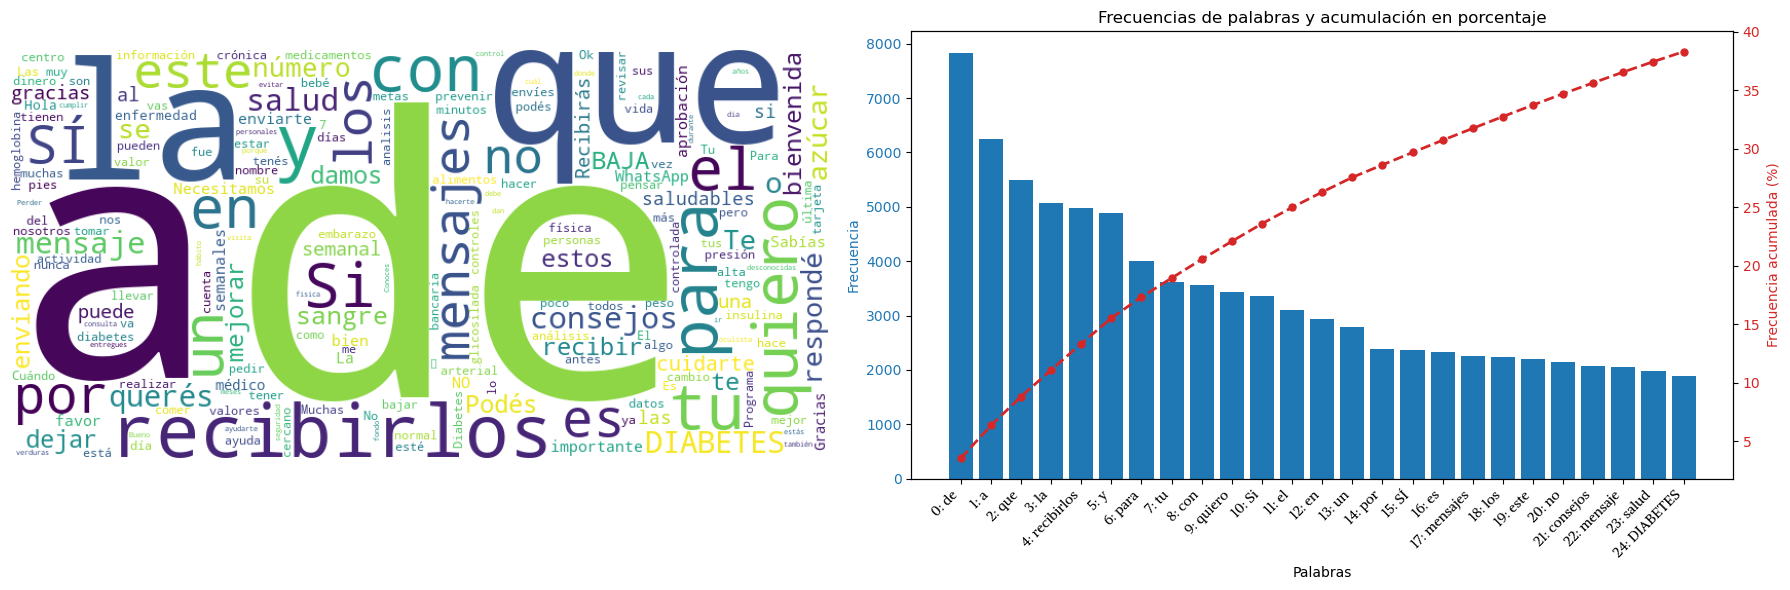

[('de', 7835),
 ('a', 6249),
 ('que', 5494),
 ('la', 5077),
 ('recibirlos', 4978),
 ('y', 4889),
 ('para', 3996),
 ('tu', 3611),
 ('con', 3561),
 ('quiero', 3424),
 ('Si', 3353),
 ('el', 3094),
 ('en', 2933),
 ('un', 2792),
 ('por', 2376),
 ('SÍ', 2362),
 ('es', 2329),
 ('mensajes', 2257),
 ('los', 2243),
 ('este', 2196),
 ('no', 2149),
 ('consejos', 2075),
 ('mensaje', 2052),
 ('salud', 1984),
 ('DIABETES', 1889),
 ('querés', 1838),
 ('o', 1729),
 ('respondé', 1662),
 ('Te', 1644),
 ('azúcar', 1625),
 ('se', 1592),
 ('número', 1513),
 ('sangre', 1436),
 ('Podés', 1350),
 ('recibir', 1306),
 ('te', 1306),
 ('dejar', 1275),
 ('estos', 1273),
 ('BAJA', 1272),
 ('mejorar', 1264),
 ('bienvenida', 1242),
 ('damos', 1241),
 ('enviando', 1241),
 ('cuidarte', 1232),
 ('semanal', 1169),
 ('Recibirás', 1167),
 ('puede', 1138),
 ('una', 1124),
 ('gracias', 1118),
 ('al', 1116),
 ('las', 1013),
 ('si', 991),
 ('saludables', 958),
 ('importante', 949),
 ('Sabías', 920),
 ('La', 918),
 ('NO', 897),


In [286]:
mostrar_conteo(df,'combinado')

Frecuencias primeros 20: [('recibirlos', 4986), ('si', 4239), ('no', 3610), ('quiero', 3462), ('diabetes', 2748), ('sí', 2567), ('mensajes', 2261), ('consejos', 2089), ('mensaje', 2073), ('gracias', 2043), ('salud', 1987), ('querés', 1872), ('azúcar', 1763), ('respondé', 1662), ('podés', 1613), ('número', 1550), ('sangre', 1436), ('aprobación', 1359), ('recibir', 1306), ('baja', 1303)]
Frecuencias últimos 20: [('suspendieron', 1), ('poniendo', 1), ('práctica', 1), ('baile', 1), ('intento', 1), ('comunicar', 1), ('conmigo', 1), ('llamame', 1), ('empiece', 1), ('cesac', 1), ('cerro', 1), ('leones', 1), ('acción', 1), ('comunicaremos', 1), ('flor', 1), ('enfermera', 1), ('co', 1), ('troles', 1), ('realizó', 1), ('wscribir', 1)]
Cantidad de palabras totales: 136165
Cantidad de palabras únicas: 3342
Cantidad de palabras frecuencia <=3: 2084
Cantidad de palabras frecuencia =1: 1538


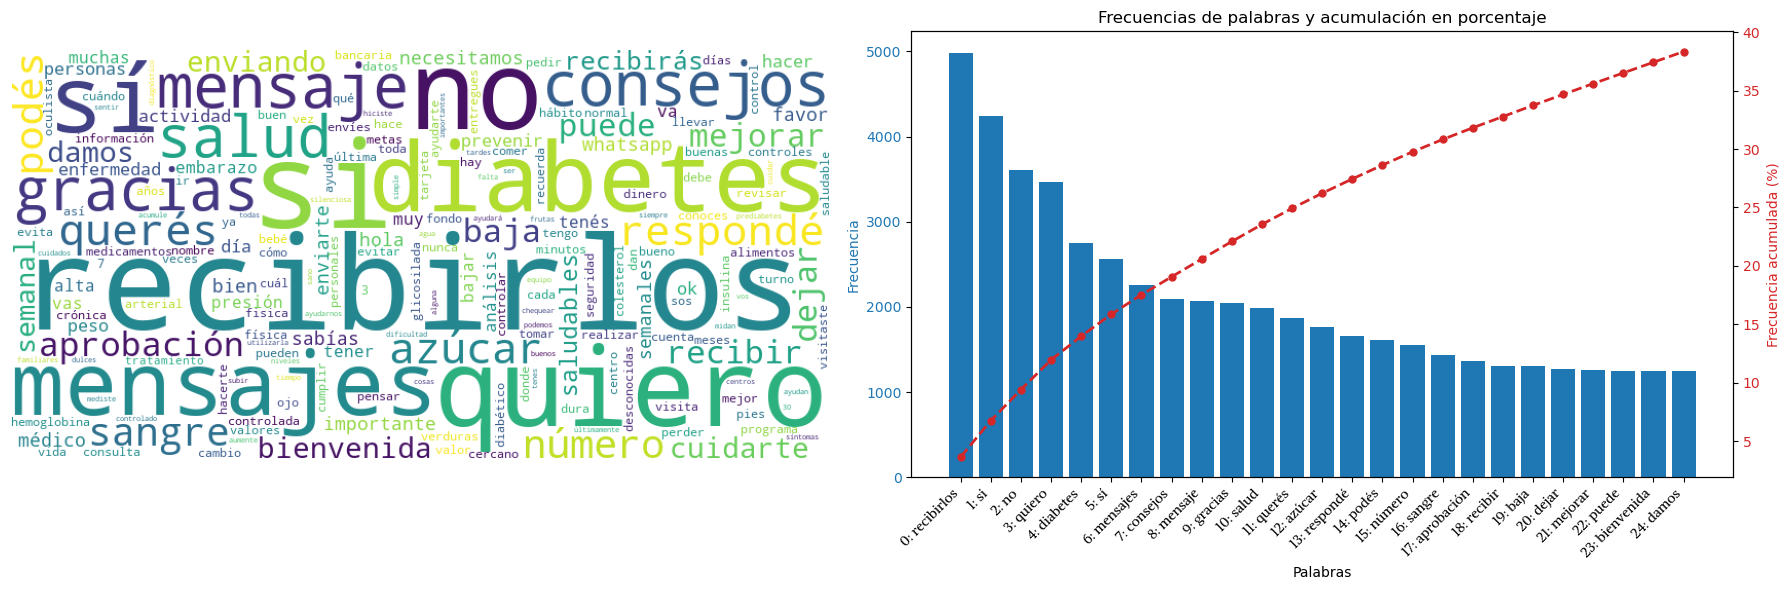

[('recibirlos', 4986),
 ('si', 4239),
 ('no', 3610),
 ('quiero', 3462),
 ('diabetes', 2748),
 ('sí', 2567),
 ('mensajes', 2261),
 ('consejos', 2089),
 ('mensaje', 2073),
 ('gracias', 2043),
 ('salud', 1987),
 ('querés', 1872),
 ('azúcar', 1763),
 ('respondé', 1662),
 ('podés', 1613),
 ('número', 1550),
 ('sangre', 1436),
 ('aprobación', 1359),
 ('recibir', 1306),
 ('baja', 1303),
 ('dejar', 1275),
 ('mejorar', 1264),
 ('puede', 1244),
 ('bienvenida', 1242),
 ('damos', 1241),
 ('enviando', 1241),
 ('cuidarte', 1232),
 ('semanal', 1169),
 ('recibirás', 1167),
 ('saludables', 958),
 ('importante', 956),
 ('sabías', 921),
 ('bien', 892),
 ('favor', 880),
 ('whatsapp', 841),
 ('necesitamos', 831),
 ('enviarte', 831),
 ('semanales', 831),
 ('hola', 802),
 ('médico', 764),
 ('enfermedad', 687),
 ('hacer', 666),
 ('ok', 639),
 ('día', 638),
 ('personas', 625),
 ('prevenir', 622),
 ('actividad', 603),
 ('peso', 602),
 ('análisis', 528),
 ('va', 508),
 ('embarazo', 501),
 ('tenés', 498),
 ('tene

In [287]:
mostrar_conteo(df,'combinado_corregido_significado_emoticones_sin_stop_words')

In [288]:
# guarda csv
df.to_csv("mensajes_preprocesados.csv")